# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
import os
os.chdir('/content/drive/MyDrive/EDAAssignment/12Datasets')
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDAAssignment/12Datasets')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        monthly_sample_data = pd.DataFrame()
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

            # Iterate through each hour of the selected date
        for date in monthly_data['date'].unique():
            df_date = monthly_data[monthly_data['date'] == date]
        for hour in range(24):
            df_hour = df_date[df_date['hour'] == hour]

                # Sample 5% of the hourly data randomly
            if not df_hour.empty:
              monthly_sample_data = df_hour.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data, monthly_sample_data], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data],ignore_index=True)# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file combined_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file Taxizones: Error creating dataset. Could not read schema from '/content/drive/MyDrive/EDAAssignment/12Datasets/Taxizones/taxi_zones.dbf'. Is this a 'parquet' file?: Could not open Parquet input source '/content/drive/MyDrive/EDAAssignment/12Datasets/Taxizones/taxi_zones.dbf': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_csv('/content/drive/MyDrive/EDAAssignment/12Datasets/combined_data.csv', index=False)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_csv('/content/drive/MyDrive/EDAAssignment/12Datasets/combined_data.csv')


In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
1         2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
2         2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
3         2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
4         2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          19.18         2.0                  N           132           249   
1          19.18         2.0                  N           132           249   
2          19.18         2.0                  N           132           249   
3          19.18         2.0                  N           132           249   
4          19.18         2.0                  N           132           249   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5       15.08          6.55   
1             1  ...      0.5       15.08          6.55   
2             1  ...      0.5       15.08          6.55   
3             1  ...      0.5       15.08          6.55   
4             1  ...      0.5       15.08          6.55   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         96.88                   2.5         1.25   
1                    1.0         96.88                   2.5         1.25   
2                    1.0         96.88                   2.5         1.25   
3                    1.0         96.88                   2.5         1.25   
4                    1.0         96.88                   2.5         1.25   

         date  hour airport_fee  
0  2023-04-01     0         NaN  
1  2023-04-01     0         NaN  
2  2023-04-01     0         NaN  
3  2023-04-01     0         NaN  
4  2023-04-01     0         NaN  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               5082 non-null   int64  
 1   tpep_pickup_datetime   5082 non-null   object 
 2   tpep_dropoff_datetime  5082 non-null   object 
 3   passenger_count        4943 non-null   float64
 4   trip_distance          5082 non-null   float64
 5   RatecodeID             4943 non-null   float64
 6   store_and_fwd_flag     4943 non-null   object 
 7   PULocationID           5082 non-null   int64  
 8   DOLocationID           5082 non-null   int64  
 9   payment_type           5082 non-null   int64  
 10  fare_amount            5082 non-null   float64
 11  extra                  5082 non-null   float64
 12  mta_tax                5082 non-null   float64
 13  tip_amount             5082 non-null   float64
 14  tolls_amount           5082 non-null   float64
 15  impr

In [ ]:
df.dtypes #understanding the datatypes of the values in each column

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
date                      object
hour                       int64
airport_fee              float64
dtype: object

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'date', 'hour',
       'airport_fee'],
      dtype='object')

In [ ]:
df.nunique()

VendorID                    2
tpep_pickup_datetime     4842
tpep_dropoff_datetime    4843
passenger_count             7
trip_distance             980
RatecodeID                  6
store_and_fwd_flag          2
PULocationID              118
DOLocationID              171
payment_type                5
fare_amount               284
extra                      16
mta_tax                     2
tip_amount                634
tolls_amount               20
improvement_surcharge       2
total_amount             1280
congestion_surcharge        2
Airport_fee                 3
date                        3
hour                       24
airport_fee                 0
dtype: int64

In [ ]:
df.describe()

VendorID  passenger_count  trip_distance   RatecodeID  PULocationID  \
count  5082.000000      4943.000000    5082.000000  4943.000000   5082.000000   
mean      1.743211         1.342100       3.150887     2.141210    169.324675   
std       0.436905         0.888629       4.437591    10.187432     64.215086   
min       1.000000         0.000000       0.000000     1.000000      1.000000   
25%       1.000000         1.000000       0.990000     1.000000    132.000000   
50%       2.000000         1.000000       1.670000     1.000000    162.000000   
75%       2.000000         1.000000       2.987500     1.000000    236.000000   
max       2.000000         6.000000      59.970000    99.000000    265.000000   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   5082.000000   5082.000000  5082.000000  5082.000000  5082.000000   
mean     168.573593      1.161551    19.081230     1.599223     0.495966   
std       69.128689      0.490486    16.912444     1.771418     0.044733   
min        1.000000      0.000000     0.000000     0.000000     0.000000   
25%      132.000000      1.000000     9.300000     0.000000     0.500000   
50%      163.000000      1.000000    13.500000     1.000000     0.500000   
75%      236.000000      1.000000    21.200000     2.500000     0.500000   
max      265.000000      4.000000   238.200000    11.750000     0.500000   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  5082.000000   5082.000000            5082.000000   5082.000000   
mean      3.436261      0.525773               0.999606     28.019799   
std       3.817964      2.095885               0.019836     21.262387   
min       0.000000      0.000000               0.000000      0.000000   
25%       1.000000      0.000000               1.000000     16.300000   
50%       2.880000      0.000000               1.000000     21.300000   
75%       4.340000      0.000000               1.000000     30.130000   
max      60.000000     32.440000               1.000000    324.110000   

       congestion_surcharge  Airport_fee         hour  airport_fee  
count           4943.000000  4943.000000  5082.000000          0.0  
mean               2.322476     0.119715    14.401023          NaN  
std                0.642167     0.438376     5.291032          NaN  
min                0.000000     0.000000     0.000000          NaN  
25%                2.500000     0.000000    11.000000          NaN  
50%                2.500000     0.000000    15.000000          NaN  
75%                2.500000     0.000000    19.000000          NaN  
max                2.500000     1.750000    23.000000          NaN

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0            2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
1            2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
2            2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
3            2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
4            2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0   
...        ...                  ...                   ...              ...   
5077         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   
5078         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   
5079         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   
5080         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   
5081         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0             19.18         2.0                  N           132   
1             19.18         2.0                  N           132   
2             19.18         2.0                  N           132   
3             19.18         2.0                  N           132   
4             19.18         2.0                  N           132   
...             ...         ...                ...           ...   
5077           5.04         1.0                  N           209   
5078           5.04         1.0                  N           209   
5079           5.04         1.0                  N           209   
5080           5.04         1.0                  N           209   
5081           5.04         1.0                  N           209   

      DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0              249             1  ...      0.5       15.08          6.55   
1              249             1  ...      0.5       15.08          6.55   
2              249             1  ...      0.5       15.08          6.55   
3              249             1  ...      0.5       15.08          6.55   
4              249             1  ...      0.5       15.08          6.55   
...            ...           ...  ...      ...         ...           ...   
5077           225             1  ...      0.5        4.56          0.00   
5078           225             1  ...      0.5        4.56          0.00   
5079           225             1  ...      0.5        4.56          0.00   
5080           225             1  ...      0.5        4.56          0.00   
5081           225             1  ...      0.5        4.56          0.00   

      improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                       1.0         96.88                   2.5         1.25   
1                       1.0         96.88                   2.5         1.25   
2                       1.0         96.88                   2.5         1.25   
3                       1.0         96.88                   2.5         1.25   
4                       1.0         96.88                   2.5         1.25   
...                     ...           ...                   ...          ...   
5077                    1.0         34.96                   2.5         0.00   
5078                    1.0         34.96                   2.5         0.00   
5079                    1.0         34.96                   2.5         0.00   
5080                    1.0         34.96                   2.5         0.00   
5081                    1.0         34.96                   2.5         0.00   

            date  hour airport_fee  
0     2023-04-01     0         NaN  
1     2023-04-01     0         NaN  
2     2023-04-01     0         NaN  
3     2023-04-01     0         NaN  
4     2023-04-01     0         NaN  
...          ...   ...         ...  
5077  2023-07-01     0         NaN  
5078  2023-07-01     0         NaN  
5079  2023-07-01     0         NaN  
5080  20

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour',
 'airport_fee']

In [ ]:
df.drop('VendorID', axis=1, inplace=True)

In [ ]:
df.shape

(5082, 21)

In [ ]:
df.drop('date',axis=1,inplace=True) #droping date and hour columns as well they were created during sampling.
df.drop('hour',axis=1,inplace=True)

In [ ]:
 #df.drop('store_and_fwd_flag',axis=1,inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
df['Airport_fee'].unique()

array([1.25, 0.  , 1.75,  nan])

In [ ]:
df['airport_fee'].unique()

array([nan])

In [ ]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])


In [ ]:
df['Airport_fee'].unique()

array([1.25, 0.  , 1.75,  nan])

In [ ]:
print(df['Airport_fee'].isna().sum()) #checking the number of missing values still exists in the combined column

139


In [ ]:
df.drop('airport_fee',axis=1,inplace=True) # dropping redundant column 'airport_fee"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   5082 non-null   object 
 1   tpep_dropoff_datetime  5082 non-null   object 
 2   passenger_count        4943 non-null   float64
 3   trip_distance          5082 non-null   float64
 4   RatecodeID             4943 non-null   float64
 5   store_and_fwd_flag     4943 non-null   object 
 6   PULocationID           5082 non-null   int64  
 7   DOLocationID           5082 non-null   int64  
 8   payment_type           5082 non-null   int64  
 9   fare_amount            5082 non-null   float64
 10  extra                  5082 non-null   float64
 11  mta_tax                5082 non-null   float64
 12  tip_amount             5082 non-null   float64
 13  tolls_amount           5082 non-null   float64
 14  improvement_surcharge  5082 non-null   float64
 15  tota

In [ ]:
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   
1  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   
2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   
3  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   
4  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
0         2.0                  N           132           249             1   
1         2.0                  N           132           249             1   
2         2.0                  N           132           249             1   
3         2.0                  N           132           249             1   
4         2.0                  N           132           249             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         70.0    0.0      0.5       15.08          6.55   
1         70.0    0.0      0.5       15.08          6.55   
2         70.0    0.0      0.5       15.08          6.55   
3         70.0    0.0      0.5       15.08          6.55   
4         70.0    0.0      0.5       15.08          6.55   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         96.88                   2.5         1.25  
1                    1.0         96.88                   2.5         1.25  
2                    1.0         96.88                   2.5         1.25  
3                    1.0         96.88                   2.5         1.25  
4                    1.0         96.88                   2.5         1.25

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
numbercols = df.select_dtypes(include='number').columns
print(numbercols)


Index(['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [ ]:
cols_with_fares = ["fare_amount", "extra" , "mta_tax", "tip_amount",  "tolls_amount", 'improvement_surcharge', "total_amount",  "congestion_surcharge", "Airport_fee"]

In [ ]:
#checking with negative values
negativalues = df[cols_with_fares] < 0
negative_fares = df[negativalues.any(axis=1)]  # Print rows with any negative values
negative_fares

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
negative_fares.shape

(0, 18)

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
negative_fares["RatecodeID"].value_counts() #to summarize the count of negative fare amounts associated with each RatecodeID

#58% of negative fares are under RateCode 1.0 and rest with 2.0


Series([], Name: count, dtype: int64)

In [ ]:
# Find which columns have negative values
negative_values = (df[cols_with_fares] < 0).sum()
print(negative_values[negative_values > 0])


Series([], dtype: int64)


In [ ]:
# fix these negative values
df[cols_with_fares] = df [cols_with_fares].abs()


In [ ]:
negative_values = (df[cols_with_fares] < 0).sum()
print(negative_values[negative_values > 0])

Series([], dtype: int64)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
null_value_counts= df.isnull().sum()
null_value_counts[null_value_counts>0]
#So by this we can see each column has 8831 missing values


passenger_count         139
RatecodeID              139
store_and_fwd_flag      139
congestion_surcharge    139
Airport_fee             139
dtype: int64

In [ ]:
missing_proportion = (df.isnull().sum() / len(df)) * 100
print(missing_proportion)

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          2.735144
trip_distance            0.000000
RatecodeID               2.735144
store_and_fwd_flag       2.735144
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     2.735144
Airport_fee              2.735144
dtype: float64


In [ ]:
missing_values = null_value_counts / len(df)
print(missing_values[missing_values > 0]*100)

passenger_count         2.735144
RatecodeID              2.735144
store_and_fwd_flag      2.735144
congestion_surcharge    2.735144
Airport_fee             2.735144
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df["passenger_count"].isnull()]


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
52    2023-10-31 00:31:50   2023-10-31 00:47:32              NaN   
113   2023-10-31 01:06:43   2023-10-31 01:30:38              NaN   
146   2023-10-31 04:29:11   2023-10-31 04:44:02              NaN   
150   2023-10-31 04:57:55   2023-10-31 05:16:12              NaN   
151   2023-10-31 04:54:56   2023-10-31 05:15:41              NaN   
...                   ...                   ...              ...   
4952  2023-10-31 23:50:04   2023-11-01 00:02:04              NaN   
4968  2023-10-31 23:13:48   2023-10-31 23:52:33              NaN   
5013  2023-10-31 23:32:48   2023-10-31 23:53:44              NaN   
5033  2023-10-31 23:29:14   2023-10-31 23:44:42              NaN   
5044  2023-10-31 23:02:23   2023-10-31 23:19:54              NaN   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
52             0.00         NaN                NaN           246   
113            7.77         NaN                NaN           249   
146            8.31         NaN                NaN           236   
150            6.39         NaN                NaN           230   
151           10.08         NaN                NaN           238   
...             ...         ...                ...           ...   
4952           1.81         NaN                NaN           234   
4968           0.00         NaN                NaN           189   
5013           3.92         NaN                NaN            37   
5033           0.00         NaN                NaN           249   
5044           2.39         NaN                NaN           137   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
52              87             0        17.95    0.0      0.5        0.00   
113            166             0        31.93    0.0      0.5        5.39   
146            138             0        26.17    0.0      0.5        7.42   
150             42             0        26.00    0.0      0.5        6.00   
151            138             0        35.03    0.0      0.5       11.49   
...            ...           ...          ...    ...      ...         ...   
4952           162             0        12.00    0.0      0.5        4.80   
4968            42             0        48.73    0.0      0.5        0.00   
5013           148             0        17.22    0.0      0.5        0.00   
5033           234             0        17.93    0.0      0.5        0.00   
5044           211             0        22.46    0.0      0.5        0.00   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
52            0.00                    1.0         21.95                   NaN   
113           0.00                    1.0         41.32                   NaN   
146           6.94                    1.0         44.53                   NaN   
150           0.00                    1.0         36.00                   NaN   
151           6.94                    1.0         57.46                   NaN   
...            ...                    ...           ...                   ...   
4952          0.00                    1.0         20.80                   NaN   
4968          0.00                    1.0         50.23                   NaN   
5013          0.00                    1.0         21.22                   NaN   
5033          0.00                    1.0         21.93                   NaN   
5044          0.00                    1.0         26.46                   NaN   

      Airport_fee  
52            NaN  
113           NaN  
146           NaN  
150           NaN  
151           NaN  
...           ...  
4952          NaN  
4968          NaN  
5013          NaN  
5033          NaN  
5044          NaN  

[139 rows x 18 columns]

In [ ]:
print("passenger count median-",df["passenger_count"].median(),"\n","passenger count mode-",df["passenger_count"].mode()[0])

passenger count median- 1.0 
 passenger count mode- 1.0


In [ ]:
df["passenger_count"].fillna(df["passenger_count"].mode()[0], inplace=True)

In [ ]:
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

In [ ]:
zero_count = (df["passenger_count"] == 0).sum()
print(f"Number of zeroes in passenger_count: {zero_count}")

Number of zeroes in passenger_count: 69


In [ ]:
df["passenger_count"].replace(0, df["passenger_count"].mode()[0], inplace=True)

In [ ]:
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
zero_count = (df["passenger_count"] == 0).sum()
print(f"Number of zeroes in passenger_count: {zero_count}")

Number of zeroes in passenger_count: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df["RatecodeID"].isnull().sum()

np.int64(139)

In [ ]:
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)

In [ ]:
df[df["RatecodeID"].isnull()]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df["congestion_surcharge"].isnull().sum()



np.int64(139)

In [ ]:
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)

In [ ]:
df[df["congestion_surcharge"].isnull()]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df.isnull().sum()


tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count            0
trip_distance              0
RatecodeID                 0
store_and_fwd_flag       139
PULocationID               0
DOLocationID               0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
congestion_surcharge       0
Airport_fee              139
dtype: int64

In [ ]:
df["store_and_fwd_flag"].isnull().sum()

np.int64(139)

In [ ]:
df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0], inplace=True)

In [ ]:
df[df["store_and_fwd_flag"].isnull()]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df.isnull().sum() # by this all nulls are fixed..

tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count            0
trip_distance              0
RatecodeID                 0
store_and_fwd_flag         0
PULocationID               0
DOLocationID               0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
congestion_surcharge       0
Airport_fee              139
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


passenger_count  trip_distance   RatecodeID  PULocationID  \
count      5082.000000    5082.000000  5082.000000   5082.000000   
mean          1.346320       3.150887     2.109996    169.324675   
std           0.865085       4.437591    10.048843     64.215086   
min           1.000000       0.000000     1.000000      1.000000   
25%           1.000000       0.990000     1.000000    132.000000   
50%           1.000000       1.670000     1.000000    162.000000   
75%           1.000000       2.987500     1.000000    236.000000   
max           6.000000      59.970000    99.000000    265.000000   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   5082.000000   5082.000000  5082.000000  5082.000000  5082.000000   
mean     168.573593      1.161551    19.081230     1.599223     0.495966   
std       69.128689      0.490486    16.912444     1.771418     0.044733   
min        1.000000      0.000000     0.000000     0.000000     0.000000   
25%      132.000000      1.000000     9.300000     0.000000     0.500000   
50%      163.000000      1.000000    13.500000     1.000000     0.500000   
75%      236.000000      1.000000    21.200000     2.500000     0.500000   
max      265.000000      4.000000   238.200000    11.750000     0.500000   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  5082.000000   5082.000000            5082.000000   5082.000000   
mean      3.436261      0.525773               0.999606     28.019799   
std       3.817964      2.095885               0.019836     21.262387   
min       0.000000      0.000000               0.000000      0.000000   
25%       1.000000      0.000000               1.000000     16.300000   
50%       2.880000      0.000000               1.000000     21.300000   
75%       4.340000      0.000000               1.000000     30.130000   
max      60.000000     32.440000               1.000000    324.110000   

       congestion_surcharge  Airport_fee  
count           5082.000000  4943.000000  
mean               2.327332     0.119715  
std                0.633984     0.438376  
min                0.000000     0.000000  
25%                2.500000     0.000000  
50%                2.500000     0.000000  
75%                2.500000     0.000000  
max                2.500000     1.750000

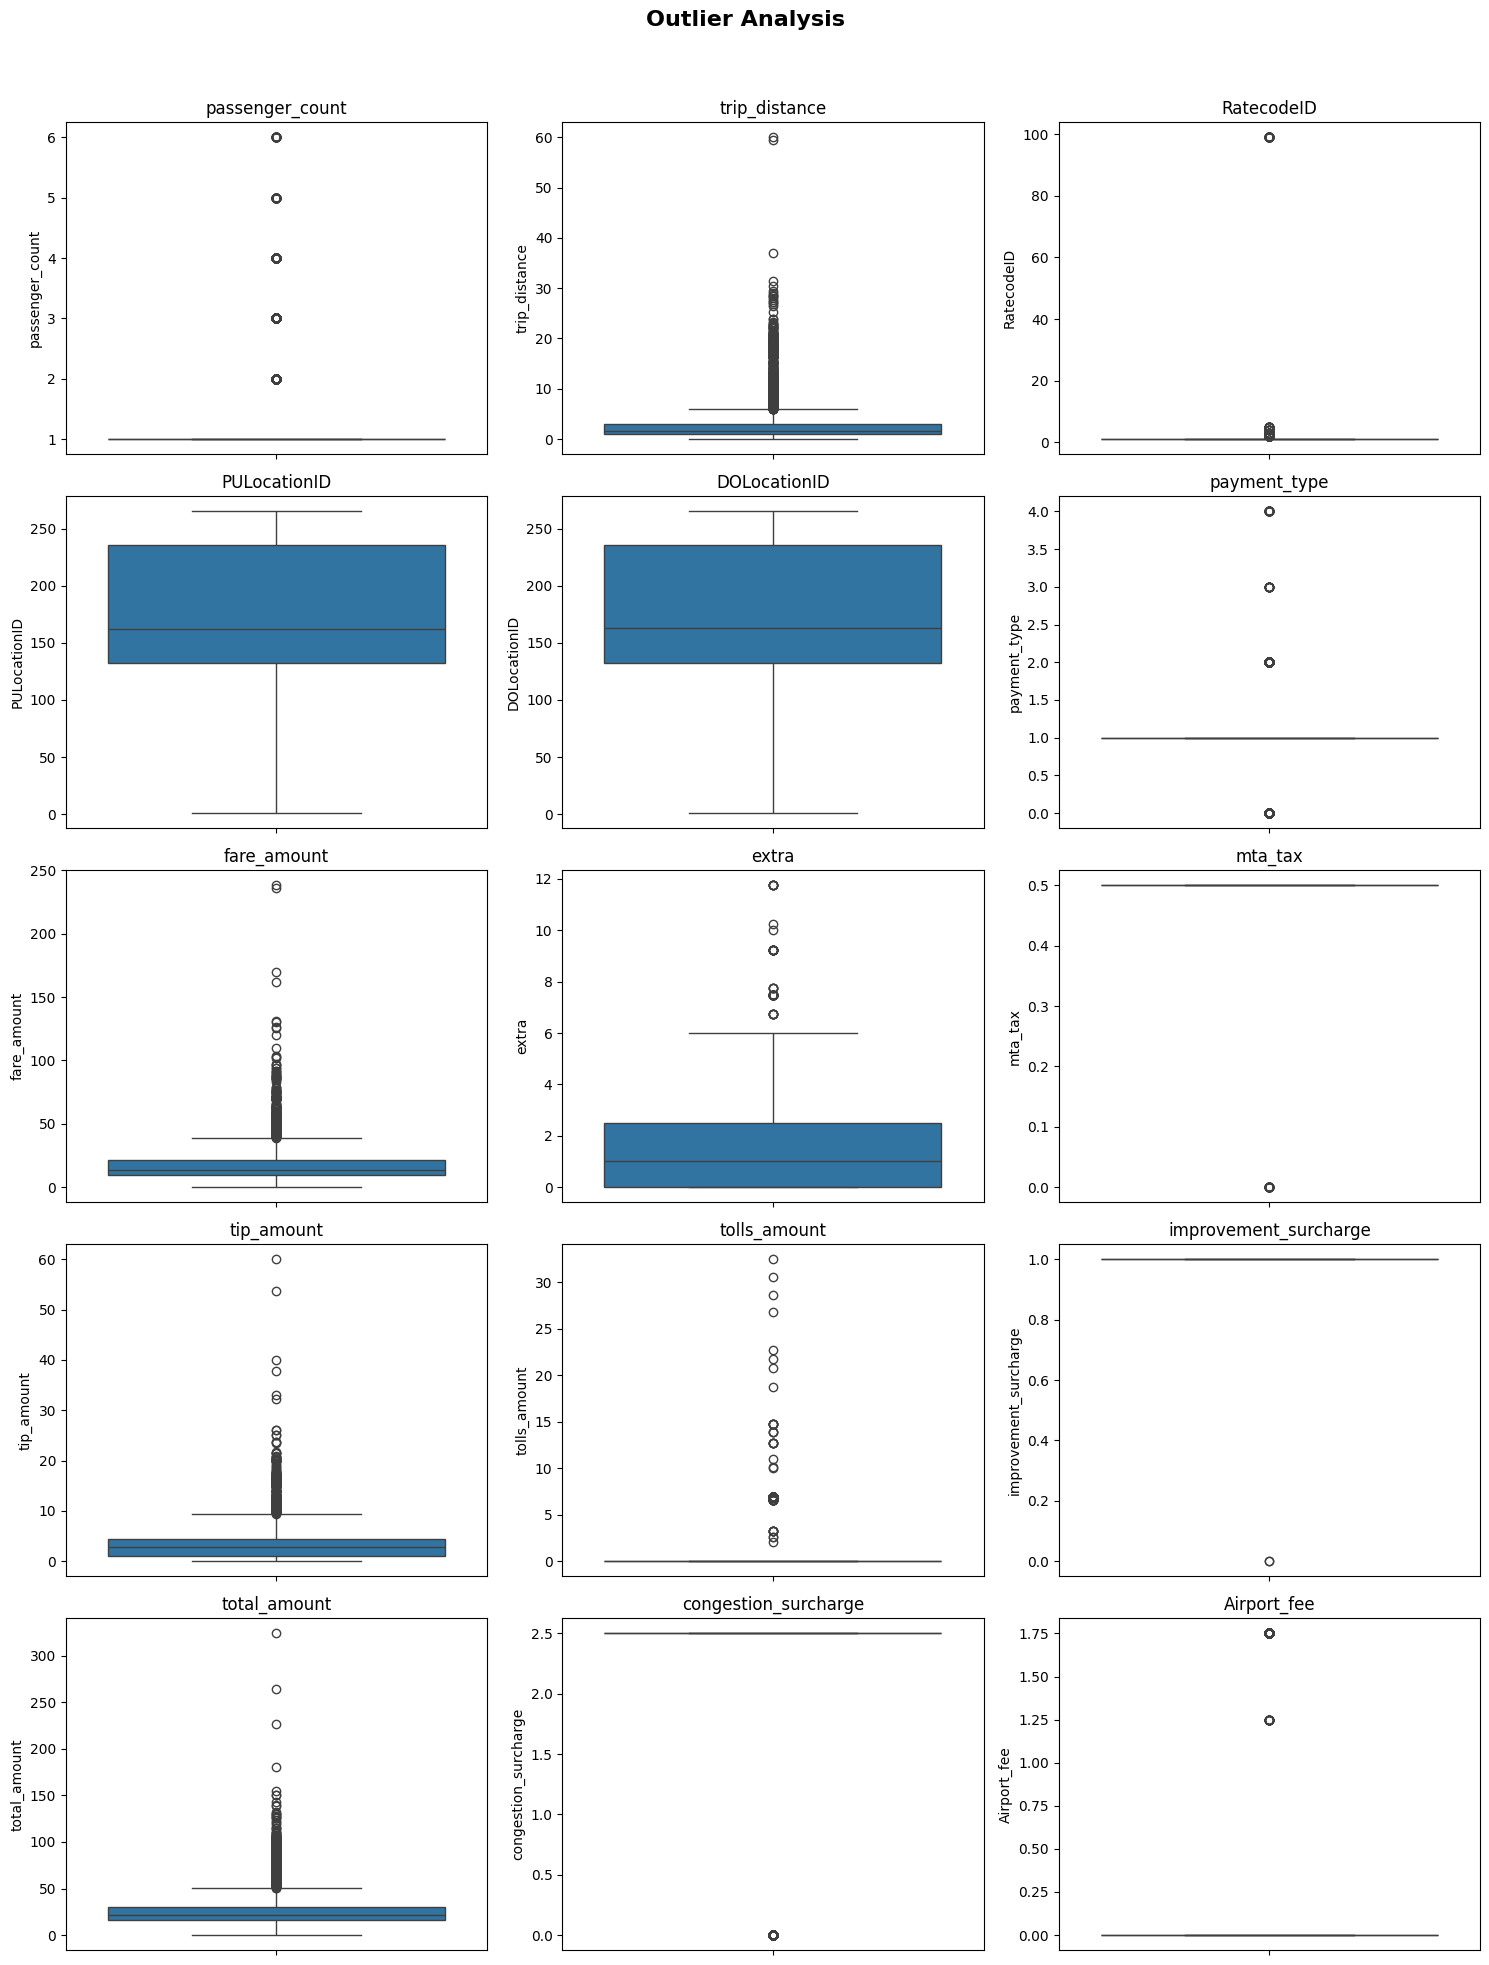

In [ ]:
numeric_cols = df.select_dtypes(include=['number'])
num_cols = len(numeric_cols.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
fig.suptitle("Outlier Analysis", fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=numeric_cols[col], ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")  # Remove x-labels for clarity
    axes[i].set_ylabel(col, fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
(df['passenger_count'] > 6).sum()

np.int64(0)

In [ ]:
df[df['passenger_count'] > 6]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [ ]:
df[df['passenger_count'] > 6]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
# Continue with outlier handling
df.describe()


passenger_count  trip_distance   RatecodeID  PULocationID  \
count      5082.000000    5082.000000  5082.000000   5082.000000   
mean          1.346320       3.150887     2.109996    169.324675   
std           0.865085       4.437591    10.048843     64.215086   
min           1.000000       0.000000     1.000000      1.000000   
25%           1.000000       0.990000     1.000000    132.000000   
50%           1.000000       1.670000     1.000000    162.000000   
75%           1.000000       2.987500     1.000000    236.000000   
max           6.000000      59.970000    99.000000    265.000000   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   5082.000000   5082.000000  5082.000000  5082.000000  5082.000000   
mean     168.573593      1.161551    19.081230     1.599223     0.495966   
std       69.128689      0.490486    16.912444     1.771418     0.044733   
min        1.000000      0.000000     0.000000     0.000000     0.000000   
25%      132.000000      1.000000     9.300000     0.000000     0.500000   
50%      163.000000      1.000000    13.500000     1.000000     0.500000   
75%      236.000000      1.000000    21.200000     2.500000     0.500000   
max      265.000000      4.000000   238.200000    11.750000     0.500000   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  5082.000000   5082.000000            5082.000000   5082.000000   
mean      3.436261      0.525773               0.999606     28.019799   
std       3.817964      2.095885               0.019836     21.262387   
min       0.000000      0.000000               0.000000      0.000000   
25%       1.000000      0.000000               1.000000     16.300000   
50%       2.880000      0.000000               1.000000     21.300000   
75%       4.340000      0.000000               1.000000     30.130000   
max      60.000000     32.440000               1.000000    324.110000   

       congestion_surcharge  Airport_fee  
count           5082.000000  4943.000000  
mean               2.327332     0.119715  
std                0.633984     0.438376  
min                0.000000     0.000000  
25%                2.500000     0.000000  
50%                2.500000     0.000000  
75%                2.500000     0.000000  
max                2.500000     1.750000

In [ ]:
# Entries where trip_distance ≈ 0 and fare_amount > 300
print("Total entries where trip_distance ≈ 0 and fare_amount > 300:-",((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)).sum())
df[((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

Total entries where trip_distance ≈ 0 and fare_amount > 300:- 0


Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

In [ ]:
df[((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
# Entrieswhere trip_distance = 0 & fare_amount =0, but pickup and dropoff locations are different
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [ ]:
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
# Records with trip_distance greater than 250 miles
df[df['trip_distance'] >250]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df = df[df['trip_distance'] <= 250]

In [ ]:
df[df['trip_distance'] >250]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
#Records with Payment type 0
df[df['payment_type'] == 0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
52    2023-10-31 00:31:50   2023-10-31 00:47:32              1.0   
113   2023-10-31 01:06:43   2023-10-31 01:30:38              1.0   
146   2023-10-31 04:29:11   2023-10-31 04:44:02              1.0   
150   2023-10-31 04:57:55   2023-10-31 05:16:12              1.0   
151   2023-10-31 04:54:56   2023-10-31 05:15:41              1.0   
...                   ...                   ...              ...   
4952  2023-10-31 23:50:04   2023-11-01 00:02:04              1.0   
4968  2023-10-31 23:13:48   2023-10-31 23:52:33              1.0   
5013  2023-10-31 23:32:48   2023-10-31 23:53:44              1.0   
5033  2023-10-31 23:29:14   2023-10-31 23:44:42              1.0   
5044  2023-10-31 23:02:23   2023-10-31 23:19:54              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
52             0.00         1.0                  N           246   
113            7.77         1.0                  N           249   
146            8.31         1.0                  N           236   
150            6.39         1.0                  N           230   
151           10.08         1.0                  N           238   
...             ...         ...                ...           ...   
4952           1.81         1.0                  N           234   
4968           0.00         1.0                  N           189   
5013           3.92         1.0                  N            37   
5033           0.00         1.0                  N           249   
5044           2.39         1.0                  N           137   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
52              87             0        17.95    0.0      0.5        0.00   
113            166             0        31.93    0.0      0.5        5.39   
146            138             0        26.17    0.0      0.5        7.42   
150             42             0        26.00    0.0      0.5        6.00   
151            138             0        35.03    0.0      0.5       11.49   
...            ...           ...          ...    ...      ...         ...   
4952           162             0        12.00    0.0      0.5        4.80   
4968            42             0        48.73    0.0      0.5        0.00   
5013           148             0        17.22    0.0      0.5        0.00   
5033           234             0        17.93    0.0      0.5        0.00   
5044           211             0        22.46    0.0      0.5        0.00   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
52            0.00                    1.0         21.95                   2.5   
113           0.00                    1.0         41.32                   2.5   
146           6.94                    1.0         44.53                   2.5   
150           0.00                    1.0         36.00                   2.5   
151           6.94                    1.0         57.46                   2.5   
...            ...                    ...           ...                   ...   
4952          0.00                    1.0         20.80                   2.5   
4968          0.00                    1.0         50.23                   2.5   
5013          0.00                    1.0         21.22                   2.5   
5033          0.00                    1.0         21.93                   2.5   
5044          0.00                    1.0         26.46                   2.5   

      Airport_fee  
52            NaN  
113           NaN  
146           NaN  
150           NaN  
151           NaN  
...           ...  
4952          NaN  
4968          NaN  
5013          NaN  
5033          NaN  
5044          NaN  

[139 rows x 18 columns]

In [ ]:
df[df['payment_type'] == 0].describe()

passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count            139.0     139.000000       139.0    139.000000    139.000000   
mean               1.0       2.136331         1.0    170.863309    155.741007   
std                0.0       3.100251         0.0     69.584398     67.726682   
min                1.0       0.000000         1.0     13.000000      4.000000   
25%                1.0       0.000000         1.0    137.000000    107.000000   
50%                1.0       1.200000         1.0    163.000000    151.000000   
75%                1.0       2.705000         1.0    236.500000    230.000000   
max                1.0      18.450000         1.0    263.000000    264.000000   

       payment_type  fare_amount       extra  mta_tax  tip_amount  \
count         139.0   139.000000  139.000000    139.0  139.000000   
mean            0.0    19.101871    0.251799      0.5    2.218201   
std             0.0     9.810341    0.887461      0.0    2.651590   
min             0.0     6.830000    0.000000      0.5    0.000000   
25%             0.0    11.880000    0.000000      0.5    0.000000   
50%             0.0    17.150000    0.000000      0.5    1.730000   
75%             0.0    23.135000    0.000000      0.5    3.370000   
max             0.0    61.470000    7.500000      0.5   13.980000   

       tolls_amount  improvement_surcharge  total_amount  \
count    139.000000                  139.0    139.000000   
mean       0.499281                    1.0     25.855324   
std        1.799730                    0.0     12.312384   
min        0.000000                    1.0     10.830000   
25%        0.000000                    1.0     18.685000   
50%        0.000000                    1.0     22.310000   
75%        0.000000                    1.0     29.580000   
max        6.940000                    1.0     83.890000   

       congestion_surcharge  Airport_fee  
count                 139.0          0.0  
mean                    2.5          NaN  
std                     0.0          NaN  
min                     2.5          NaN  
25%                     2.5          NaN  
50%                     2.5          NaN  
75%                     2.5          NaN  
max                     2.5          NaN

In [ ]:
#Dropping rows where trip_distance == 0 and fare_amount == 0
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

In [ ]:
df[((df['payment_type'] == 0) &(df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df[df['payment_type'] == 0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
52    2023-10-31 00:31:50   2023-10-31 00:47:32              1.0   
113   2023-10-31 01:06:43   2023-10-31 01:30:38              1.0   
146   2023-10-31 04:29:11   2023-10-31 04:44:02              1.0   
150   2023-10-31 04:57:55   2023-10-31 05:16:12              1.0   
151   2023-10-31 04:54:56   2023-10-31 05:15:41              1.0   
...                   ...                   ...              ...   
4952  2023-10-31 23:50:04   2023-11-01 00:02:04              1.0   
4968  2023-10-31 23:13:48   2023-10-31 23:52:33              1.0   
5013  2023-10-31 23:32:48   2023-10-31 23:53:44              1.0   
5033  2023-10-31 23:29:14   2023-10-31 23:44:42              1.0   
5044  2023-10-31 23:02:23   2023-10-31 23:19:54              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
52             0.00         1.0                  N           246   
113            7.77         1.0                  N           249   
146            8.31         1.0                  N           236   
150            6.39         1.0                  N           230   
151           10.08         1.0                  N           238   
...             ...         ...                ...           ...   
4952           1.81         1.0                  N           234   
4968           0.00         1.0                  N           189   
5013           3.92         1.0                  N            37   
5033           0.00         1.0                  N           249   
5044           2.39         1.0                  N           137   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
52              87             0        17.95    0.0      0.5        0.00   
113            166             0        31.93    0.0      0.5        5.39   
146            138             0        26.17    0.0      0.5        7.42   
150             42             0        26.00    0.0      0.5        6.00   
151            138             0        35.03    0.0      0.5       11.49   
...            ...           ...          ...    ...      ...         ...   
4952           162             0        12.00    0.0      0.5        4.80   
4968            42             0        48.73    0.0      0.5        0.00   
5013           148             0        17.22    0.0      0.5        0.00   
5033           234             0        17.93    0.0      0.5        0.00   
5044           211             0        22.46    0.0      0.5        0.00   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
52            0.00                    1.0         21.95                   2.5   
113           0.00                    1.0         41.32                   2.5   
146           6.94                    1.0         44.53                   2.5   
150           0.00                    1.0         36.00                   2.5   
151           6.94                    1.0         57.46                   2.5   
...            ...                    ...           ...                   ...   
4952          0.00                    1.0         20.80                   2.5   
4968          0.00                    1.0         50.23                   2.5   
5013          0.00                    1.0         21.22                   2.5   
5033          0.00                    1.0         21.93                   2.5   
5044          0.00                    1.0         26.46                   2.5   

      Airport_fee  
52            NaN  
113           NaN  
146           NaN  
150           NaN  
151           NaN  
...           ...  
4952          NaN  
4968          NaN  
5013          NaN  
5033          NaN  
5044          NaN  

[139 rows x 18 columns]

In [ ]:
#Assign the most common valid payment_type to these rows:
most_common_payment = df.loc[df['payment_type'] != 0, 'payment_type'].mode()[0]
df['payment_type'].replace(0, most_common_payment, inplace=True)

In [ ]:
df[df['payment_type'] == 0]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
# Do any columns need standardising?
df[df['tolls_amount']>100] #Handling high toll amounts


Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df = df[df['tolls_amount']<100]

In [ ]:
df[df['tolls_amount']>100]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df[df['RatecodeID']>6]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
143   2023-10-31 04:46:21   2023-10-31 05:08:25              1.0   
252   2023-10-31 06:44:04   2023-10-31 07:49:13              1.0   
255   2023-10-31 06:12:45   2023-10-31 07:00:14              1.0   
268   2023-10-31 06:45:24   2023-10-31 07:30:17              1.0   
270   2023-10-31 06:30:41   2023-10-31 06:47:32              1.0   
279   2023-10-31 07:20:08   2023-10-31 07:37:33              1.0   
426   2023-10-31 07:25:53   2023-10-31 07:59:22              1.0   
545   2023-10-31 08:21:47   2023-10-31 09:54:28              1.0   
551   2023-10-31 08:44:44   2023-10-31 10:18:16              1.0   
577   2023-10-31 08:32:35   2023-10-31 09:01:47              1.0   
598   2023-10-31 08:14:00   2023-10-31 08:51:17              1.0   
602   2023-10-31 08:56:02   2023-10-31 10:14:32              1.0   
740   2023-10-31 09:38:02   2023-10-31 09:53:06              1.0   
749   2023-10-31 09:27:05   2023-10-31 10:17:42              1.0   
772   2023-10-31 09:29:38   2023-10-31 09:44:39              1.0   
808   2023-10-31 09:41:59   2023-10-31 09:54:09              1.0   
841   2023-10-31 09:26:46   2023-10-31 09:41:23              2.0   
987   2023-10-31 10:32:39   2023-10-31 11:14:56              1.0   
1028  2023-10-31 10:54:49   2023-10-31 11:49:28              1.0   
1060  2023-10-31 10:25:45   2023-10-31 10:53:36              1.0   
1075  2023-10-31 10:40:29   2023-10-31 10:59:37              1.0   
1076  2023-10-31 10:51:26   2023-10-31 11:15:23              1.0   
1085  2023-10-31 10:15:33   2023-10-31 11:02:02              1.0   
1086  2023-10-31 10:37:13   2023-10-31 12:00:44              1.0   
1107  2023-10-31 10:12:18   2023-10-31 10:47:17              1.0   
1131  2023-10-31 10:38:44   2023-10-31 10:52:46              1.0   
1261  2023-10-31 11:47:39   2023-10-31 12:00:52              1.0   
1283  2023-10-31 11:47:08   2023-10-31 12:07:02              1.0   
1320  2023-10-31 11:59:31   2023-10-31 12:12:42              1.0   
1331  2023-10-31 11:06:20   2023-10-31 11:37:16              1.0   
1397  2023-10-31 11:17:41   2023-10-31 11:27:37              1.0   
1417  2023-10-31 11:32:43   2023-10-31 12:22:05              1.0   
1441  2023-10-31 11:39:58   2023-10-31 11:57:18              1.0   
1578  2023-10-31 12:26:46   2023-10-31 13:13:22              1.0   
1600  2023-10-31 12:35:58   2023-10-31 13:36:45              1.0   
1650  2023-10-31 12:17:46   2023-10-31 12:57:43              1.0   
1692  2023-10-31 12:12:42   2023-10-31 12:39:46              1.0   
1710  2023-10-31 12:54:48   2023-10-31 13:17:03              1.0   
1715  2023-10-31 12:46:52   2023-10-31 13:12:39              1.0   
1741  2023-10-31 12:59:41   2023-10-31 13:51:52              1.0   
1773  2023-10-31 13:05:13   2023-10-31 14:02:31              1.0   
1845  2023-10-31 13:27:27   2023-10-31 14:47:27              1.0   
1924  2023-10-31 13:36:53   2023-10-31 14:20:44              1.0   
2032  2023-10-31 13:20:30   2023-10-31 14:11:01              1.0   
2119  2023-10-31 14:27:23   2023-10-31 15:35:28              1.0   
2172  2023-10-31 14:39:42   2023-10-31 16:08:07              1.0   
2193  2023-10-31 14:35:06   2023-10-31 15:51:08              1.0   
2224  2023-10-31 14:07:51   2023-10-31 14:57:51              1.0   
2264  2023-10-31 14:46:08   2023-10-31 15:43:20              1.0   
2285  2023-10-31 14:13:26   2023-10-31 14:54:51              1.0   
2428  2023-10-31 15:41:18   2023-10-31 16:05:26              1.0   
2795  2023-10-31 16:25:17   2023-10-31 17:33:33              1.0   
2834  2023-10-31 16:07:50   2023-10-31 16:31:14              1.0   
4007  2023-10-31 19:51:10   2023-10-31 20:15:51              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
143             3.8        99.0                  N            55   
252            14.6        99.0                  N           218   
255             1.9        99.0                  N          

In [ ]:
 #Find the mode (most common value) of RatecodeID
most_common_ratecode = df.loc[df['RatecodeID'] <= 6, 'RatecodeID'].mode()[0]

# Replace RatecodeID values greater than 6 with the mode
df.loc[df['RatecodeID'] > 6, 'RatecodeID'] = most_common_ratecode

In [ ]:
df.describe()

passenger_count  trip_distance   RatecodeID  PULocationID  \
count      5082.000000    5082.000000  5082.000000   5082.000000   
mean          1.346320       3.150887     1.068674    169.324675   
std           0.865085       4.437591     0.370384     64.215086   
min           1.000000       0.000000     1.000000      1.000000   
25%           1.000000       0.990000     1.000000    132.000000   
50%           1.000000       1.670000     1.000000    162.000000   
75%           1.000000       2.987500     1.000000    236.000000   
max           6.000000      59.970000     5.000000    265.000000   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   5082.000000   5082.000000  5082.000000  5082.000000  5082.000000   
mean     168.573593      1.188902    19.081230     1.599223     0.495966   
std       69.128689      0.451256    16.912444     1.771418     0.044733   
min        1.000000      1.000000     0.000000     0.000000     0.000000   
25%      132.000000      1.000000     9.300000     0.000000     0.500000   
50%      163.000000      1.000000    13.500000     1.000000     0.500000   
75%      236.000000      1.000000    21.200000     2.500000     0.500000   
max      265.000000      4.000000   238.200000    11.750000     0.500000   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  5082.000000   5082.000000            5082.000000   5082.000000   
mean      3.436261      0.525773               0.999606     28.019799   
std       3.817964      2.095885               0.019836     21.262387   
min       0.000000      0.000000               0.000000      0.000000   
25%       1.000000      0.000000               1.000000     16.300000   
50%       2.880000      0.000000               1.000000     21.300000   
75%       4.340000      0.000000               1.000000     30.130000   
max      60.000000     32.440000               1.000000    324.110000   

       congestion_surcharge  Airport_fee  
count           5082.000000  4943.000000  
mean               2.327332     0.119715  
std                0.633984     0.438376  
min                0.000000     0.000000  
25%                2.500000     0.000000  
50%                2.500000     0.000000  
75%                2.500000     0.000000  
max                2.500000     1.750000

In [ ]:
df[df['tip_amount']>100]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df[df['fare_amount'] <= 0]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2461  2023-10-31 15:42:05   2023-10-31 15:46:18              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2461            0.5         1.0                  N           236   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2461           262             4          0.0    0.0      0.0         0.0   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
2461           0.0                    0.0           0.0                   0.0   

      Airport_fee  
2461          0.0

In [ ]:
#Impute fare_amount == 0 for trips with trip_distance > 0
# Calculate median fare per mile
median_fare_per_mile = df[df['fare_amount'] > 0].groupby('trip_distance')['fare_amount'].median()

# Apply imputation
df.loc[(df['fare_amount'] == 0) & (df['trip_distance'] > 0), 'fare_amount'] = \
    df['trip_distance'].map(median_fare_per_mile)

In [ ]:
df[df['fare_amount'] <= 0]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df[df['fare_amount'] >500]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
df.describe()

passenger_count  trip_distance   RatecodeID  PULocationID  \
count      5082.000000    5082.000000  5082.000000   5082.000000   
mean          1.346320       3.150887     1.068674    169.324675   
std           0.865085       4.437591     0.370384     64.215086   
min           1.000000       0.000000     1.000000      1.000000   
25%           1.000000       0.990000     1.000000    132.000000   
50%           1.000000       1.670000     1.000000    162.000000   
75%           1.000000       2.987500     1.000000    236.000000   
max           6.000000      59.970000     5.000000    265.000000   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   5082.000000   5082.000000  5082.000000  5082.000000  5082.000000   
mean     168.573593      1.188902    19.082509     1.599223     0.495966   
std       69.128689      0.451256    16.911246     1.771418     0.044733   
min        1.000000      1.000000     0.010000     0.000000     0.000000   
25%      132.000000      1.000000     9.300000     0.000000     0.500000   
50%      163.000000      1.000000    13.500000     1.000000     0.500000   
75%      236.000000      1.000000    21.200000     2.500000     0.500000   
max      265.000000      4.000000   238.200000    11.750000     0.500000   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  5082.000000   5082.000000            5082.000000   5082.000000   
mean      3.436261      0.525773               0.999606     28.019799   
std       3.817964      2.095885               0.019836     21.262387   
min       0.000000      0.000000               0.000000      0.000000   
25%       1.000000      0.000000               1.000000     16.300000   
50%       2.880000      0.000000               1.000000     21.300000   
75%       4.340000      0.000000               1.000000     30.130000   
max      60.000000     32.440000               1.000000    324.110000   

       congestion_surcharge  Airport_fee  
count           5082.000000  4943.000000  
mean               2.327332     0.119715  
std                0.633984     0.438376  
min                0.000000     0.000000  
25%                2.500000     0.000000  
50%                2.500000     0.000000  
75%                2.500000     0.000000  
max                2.500000     1.750000

In [ ]:
df.shape

(5082, 18)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

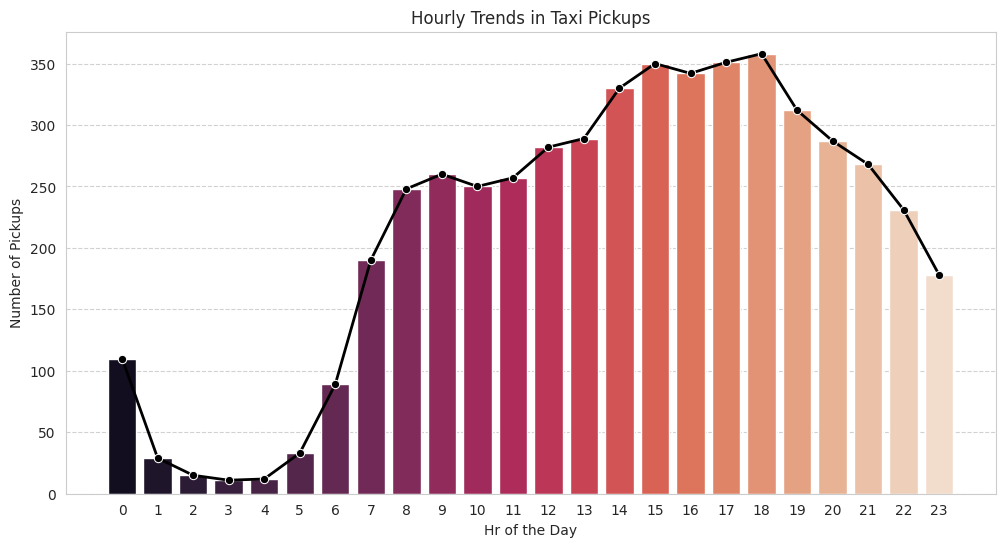

In [ ]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
hourly_pickups = df.groupby("pickup_hour").size()

# Plotting the hourly trends
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="rocket")
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, color='black', marker='o', linewidth=2)

# Labels and title
plt.xlabel('Hr of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(range(24))  # Show all hours from 0 to 23
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()




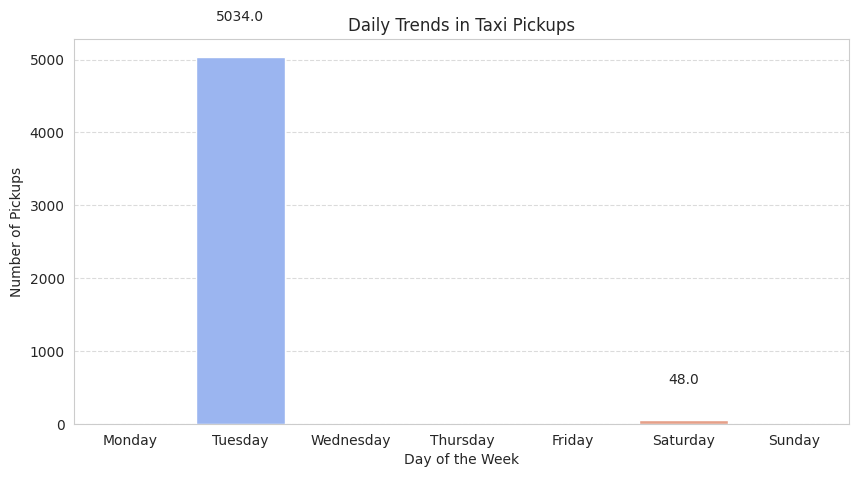

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract the day of the week (0=Monday, 6=Sunday)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
#Extract the day of the week
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()


# Define day labels
daily_pickups = df['pickup_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the daily trends
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="coolwarm")

# Labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the values on top of bars
for i, val in enumerate(daily_pickups):
    plt.text(i, val + 500, str(val), ha='center', fontsize=10)

plt.show()




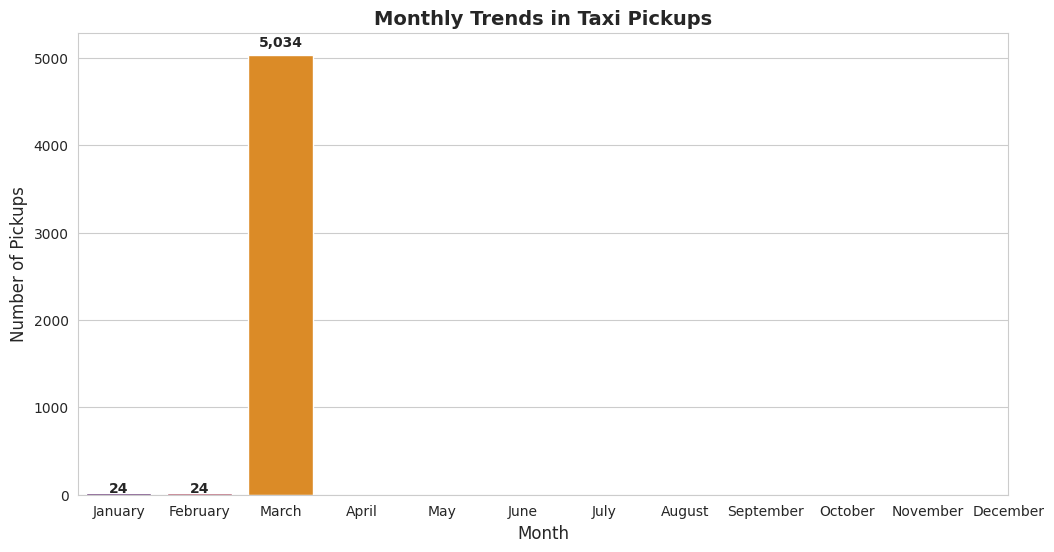

In [ ]:
# Show the monthly trends in pickups
# Extract the month from datetime
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month

# Count pickups per month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

# Plot the monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="inferno")

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.title("Monthly Trends in Taxi Pickups", fontsize=14, fontweight='bold')

# Correct x-axis labels
plt.xticks(ticks=range(12), labels=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_pickups.values):
    plt.text(i, val * 1.02, f"{val:,}", ha='center', fontsize=10, fontweight='bold')

plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
# List of financial columns to check
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
zero_counts = (df[financial_columns] == 0).sum()

# Count negative values
negative_counts = (df[financial_columns] < 0).sum()

# Display results
print("Zero Values in Financial Columns:")
print(zero_counts)
print("\nNegative Values in Financial Columns:")
print(negative_counts)


Zero Values in Financial Columns:
fare_amount         0
tip_amount       1117
total_amount        1
trip_distance     113
dtype: int64

Negative Values in Financial Columns:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
# Define columns to filter
filter_columns = ["fare_amount", "total_amount", "trip_distance"]

# Count zero values before filtering
zero_counts_before = (df[filter_columns] == 0).sum()
print("Zero Values Before Filtering:")
print(zero_counts_before)

# Remove rows where fare_amount or total_amount is zero
filtered_taxi_data = df[
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0)
]

# Handling trip_distance:
#Keep zero distances if fare > 0 (Uncomment to use this instead)
filtered_taxi_data = filtered_taxi_data[(filtered_taxi_data["trip_distance"] > 0) | (filtered_taxi_data["fare_amount"] > 0)]

# Count zero values after filtering
zero_counts_after = (filtered_taxi_data[filter_columns] == 0).sum()
print("\nZero Values After Filtering:")
print(zero_counts_after)




Zero Values Before Filtering:
fare_amount        0
total_amount       1
trip_distance    113
dtype: int64

Zero Values After Filtering:
fare_amount        0
total_amount       0
trip_distance    113
dtype: int64


In [ ]:
filtered_taxi_data[(filtered_taxi_data[filter_columns] == 0).any(axis=1)]

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
30    2023-10-31 00:31:57   2023-10-31 00:32:16              1.0   
52    2023-10-31 00:31:50   2023-10-31 00:47:32              1.0   
137   2023-10-31 03:29:10   2023-10-31 03:29:33              2.0   
149   2023-10-31 04:56:00   2023-10-31 05:00:53              1.0   
161   2023-10-31 05:52:54   2023-10-31 06:07:09              1.0   
...                   ...                   ...              ...   
4922  2023-10-31 23:39:29   2023-10-31 23:52:29              1.0   
4934  2023-10-31 23:18:21   2023-10-31 23:48:05              1.0   
4968  2023-10-31 23:13:48   2023-10-31 23:52:33              1.0   
5021  2023-10-31 23:50:21   2023-10-31 23:50:30              1.0   
5033  2023-10-31 23:29:14   2023-10-31 23:44:42              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
30              0.0         2.0                  N           142   
52              0.0         1.0                  N           246   
137             0.0         5.0                  N             1   
149             0.0         1.0                  N            48   
161             0.0         1.0                  N            47   
...             ...         ...                ...           ...   
4922            0.0         1.0                  N            65   
4934            0.0         1.0                  N           142   
4968            0.0         1.0                  N           189   
5021            0.0         1.0                  N           263   
5033            0.0         1.0                  N           249   

      DOLocationID  payment_type  fare_amount  ...  mta_tax  tip_amount  \
30             142             1        70.00  ...      0.5       16.19   
52              87             1        17.95  ...      0.5        0.00   
137              1             1        79.00  ...      0.0        0.00   
149            230             1         5.80  ...      0.5        1.00   
161             74             1        25.50  ...      0.5        0.00   
...            ...           ...          ...  ...      ...         ...   
4922            79             1        18.40  ...      0.5        0.00   
4934           144             1        28.60  ...      0.5        0.00   
4968            42             1        48.73  ...      0.5        0.00   
5021           263             1         3.00  ...      0.5        2.40   
5033           234             1        17.93  ...      0.5        0.00   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
30            6.94                    1.0         97.13                   2.5   
52            0.00                    1.0         21.95                   2.5   
137           0.00                    1.0         80.00                   0.0   
149           0.00                    1.0          9.30                   0.0   
161           6.94                    1.0         33.94                   0.0   
...            ...                    ...           ...                   ...   
4922          0.00                    1.0         22.40                   2.5   
4934          0.00                    1.0         32.60                   2.5   
4968          0.00                    1.0         50.23                   2.5   
5021          0.00                    1.0         10.40                   2.5   
5033          0.00                    1.0         21.93                   2.5   

      Airport_fee  pickup_hour  pickup_day pickup_month  
30            0.0            0     Tuesday           10  
52            NaN            0     Tuesday           10  
137           0.0            3     Tuesday           10  
149           0.0            4     Tuesday           10  
161           0.0            5     Tuesday           10  
...           ...          ...         ...          ...  
4922          NaN           23     Tuesday           10  
4934          NaN           23   

In [ ]:
filtered_taxi_data = filtered_taxi_data[~((filtered_taxi_data["trip_distance"] == 0) & (filtered_taxi_data["PULocationID"] != filtered_taxi_data["DOLocationID"]))]

In [ ]:
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
(filtered_taxi_data[financial_columns] == 0).sum()

fare_amount         0
tip_amount       1053
total_amount        0
trip_distance      38
dtype: int64

In [ ]:
filtered_taxi_data.shape

(5006, 21)

In [ ]:
filtered_taxi_data.describe()

tpep_pickup_datetime  passenger_count  trip_distance  \
count                           5006      5006.000000    5006.000000   
mean   2023-10-30 00:20:37.192968448         1.349581       3.198624   
min              2023-04-01 00:55:24         1.000000       0.000000   
25%              2023-10-31 11:06:28         1.000000       1.000000   
50%              2023-10-31 15:23:24         1.000000       1.700000   
75%              2023-10-31 18:58:35         1.000000       3.000000   
max              2023-10-31 23:59:07         6.000000      59.970000   
std                              NaN         0.869305       4.454075   

        RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  \
count  5006.000000   5006.000000   5006.000000   5006.000000  5006.000000   
mean      1.068917    169.554934    168.750499      1.189573    19.098138   
min       1.000000      1.000000      1.000000      1.000000     0.010000   
25%       1.000000    132.000000    133.000000      1.000000     9.300000   
50%       1.000000    162.000000    163.000000      1.000000    13.500000   
75%       1.000000    236.000000    236.000000      1.000000    21.200000   
max       5.000000    265.000000    265.000000      4.000000   238.200000   
std       0.368929     64.106443     69.107467      0.449907    17.000608   

             extra      mta_tax   tip_amount  tolls_amount  \
count  5006.000000  5006.000000  5006.000000   5006.000000   
mean      1.617010     0.496205     3.479984      0.526824   
min       0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.500000     1.000000      0.000000   
50%       1.000000     0.500000     2.900000      0.000000   
75%       2.500000     0.500000     4.400000      0.000000   
max      11.750000     0.500000    60.000000     32.440000   
std       1.773122     0.043402     3.824539      2.101050   

       improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
count                 5006.0   5006.000000           5006.000000  4917.000000   
mean                     1.0     28.100002              2.329704     0.120348   
min                      1.0      4.500000              0.000000     0.000000   
25%                      1.0     16.300000              2.500000     0.000000   
50%                      1.0     21.305000              2.500000     0.000000   
75%                      1.0     30.200000              2.500000     0.000000   
max                      1.0    324.110000              2.500000     1.750000   
std                      0.0     21.377846              0.629935     0.439447   

       pickup_hour  pickup_month  
count  5006.000000   5006.000000  
mean     14.390132      9.956852  
min       0.000000      4.000000  
25%      11.000000     10.000000  
50%      15.000000     10.000000  
75%      18.000000     10.000000  
max      23.000000     10.000000  
std       5.280713      0.462517

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

pickup_month
4       2325.12
7        839.04
10    137504.45
Name: total_amount, dtype: float64


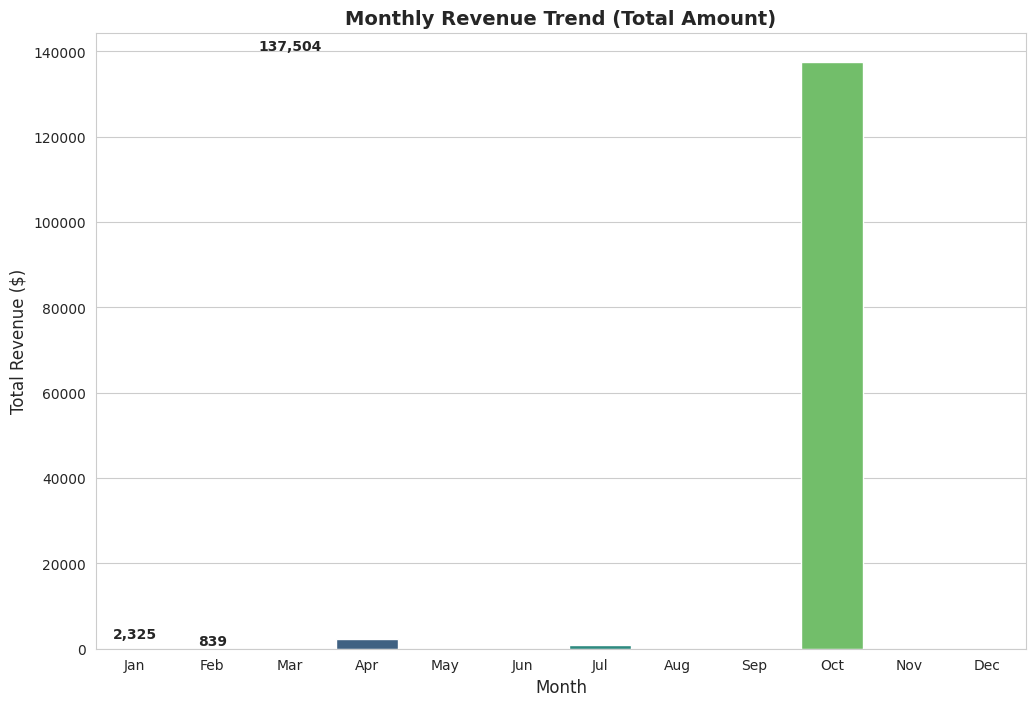

In [ ]:
# Group data by month and analyse monthly revenue
# Group by month and calculate total revenue
monthly_revenue = filtered_taxi_data.groupby('pickup_month')['total_amount'].sum().sort_index()
print(monthly_revenue)
# Plot the revenue trend
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis", order=range(1, 13))

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Monthly Revenue Trend (Total Amount)", fontsize=14, fontweight='bold')

# Format x-axis labels
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_revenue.values):
    plt.text(i, val * 1.02, f"{val:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

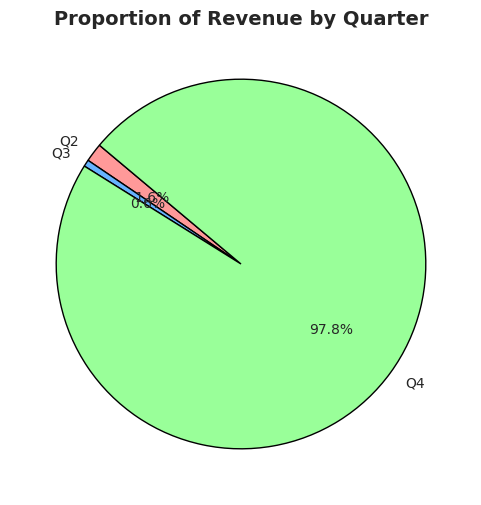

In [ ]:
# Calculate proportion of each quarter
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter

#Group by quarter and sum total revenue
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()

# Define Labels and Colors
labels =  [f"Q{q}" for q in quarterly_revenue.index]

# Plot the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and Show
plt.title("Proportion of Revenue by Quarter", fontsize=14, fontweight='bold')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.9410


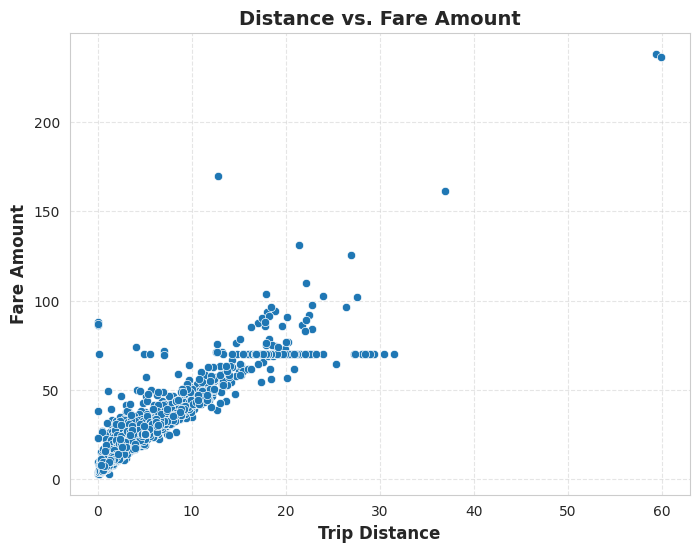

In [ ]:
# Show how trip fare is affected by distance
# Step 1: Filter out invalid distances
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_distance'] > 0]

# Step 2: Compute correlation
correlation = filtered_df["trip_distance"].corr(filtered_df["fare_amount"])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

# Step 3: Create the figure
plt.figure(figsize=(8, 6))

# Step 4: Scatter plot with transparency for clarity
sns.scatterplot(
    x="trip_distance",
    y="fare_amount",
    data=filtered_df,
)
# Step 6: Customize labels and titles
plt.xlabel("Trip Distance", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')
plt.title("Distance vs. Fare Amount", fontsize=14, fontweight='bold')

# Step 7: Grid and Adjust Layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()




In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors

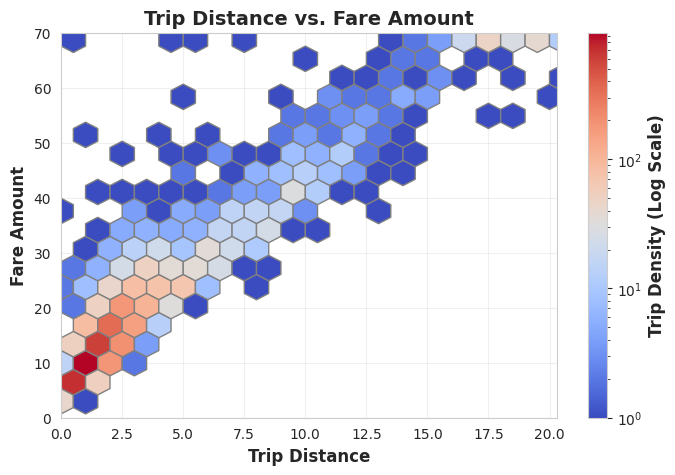

In [ ]:
# Step 1: Create hexbin plot
plt.figure(figsize=(8, 5))

hb = plt.hexbin(
    filtered_df["trip_distance"],
    filtered_df["fare_amount"],
    gridsize=60,  # Increase for better detail
    cmap="coolwarm",  # More readable colors
    mincnt=1,  # Avoid empty bins
    edgecolors="gray",  # Improve hexagon visibility
  norm=mcolors.LogNorm()  # Log scale for density visibility
)

# Step 2: Add color bar
cb = plt.colorbar(hb, label="Density of Trips")
cb.set_label("Trip Density (Log Scale)", fontsize=12, fontweight="bold")

# Step 3: Customize axes and title
plt.xlabel("Trip Distance", fontsize=12, fontweight="bold")
plt.ylabel("Fare Amount", fontsize=12, fontweight="bold")
plt.title("Trip Distance vs. Fare Amount", fontsize=14, fontweight="bold")

# Step 4: Limit outliers
plt.xlim(0, filtered_df["trip_distance"].quantile(0.99))
plt.ylim(0, filtered_df["fare_amount"].quantile(0.99))

# Step 5: Add light grid
plt.grid(alpha=0.3)

# Step 6: Show the plot
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration

filtered_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime'])
filtered_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_dropoff_datetime'])
filtered_taxi_data['trip_duration'] = (filtered_taxi_data['tpep_dropoff_datetime'] - filtered_taxi_data['tpep_pickup_datetime']).dt.total_seconds() /60 # Convert to minutes

# Filter out rows with zero or negative duration (if any)
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_duration'] > 0]

# Calculate the correlation coefficient between trip_duration and fare_amount
correlation = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.2f}")

# Plot the scatter plot between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['trip_duration'], y=filtered_df['fare_amount'], color='green', alpha=0.6)

# Add labels and title
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Relationship between Trip Duration and Fare Amount", fontsize=14, fontweight='bold')
# Show the plot
plt.show()



Correlation between trip_duration and fare_amount: 0.21


In [ ]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    data=filtered_taxi_data,
    x='passenger_count',
    y='fare_amount',
    palette="pastel",
    showfliers=True
)
plt.ylim(0, filtered_taxi_data["fare_amount"].quantile(0.99))

# Add title and labels
plt.title("Passenger Count vs. Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Count", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



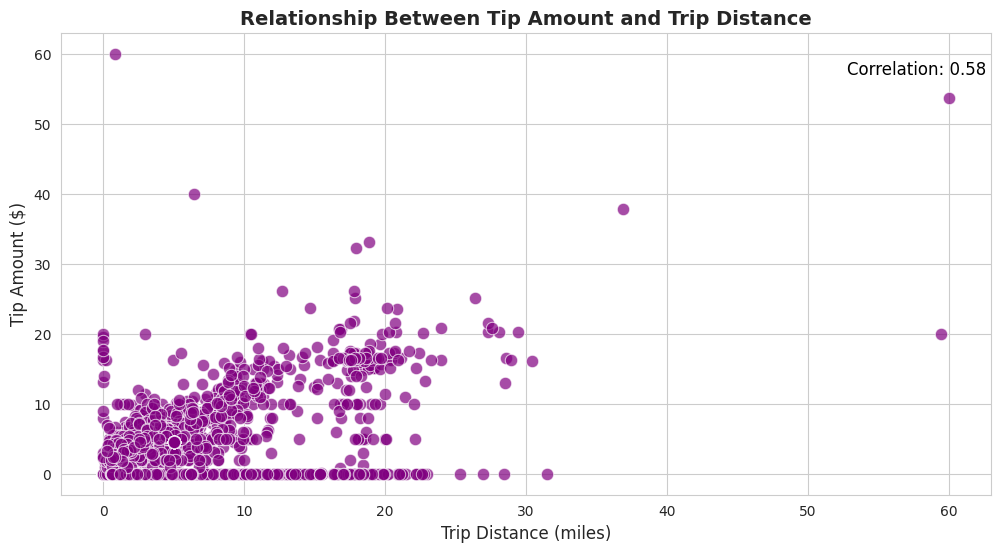

In [ ]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=filtered_taxi_data, color='purple', s=80, alpha=0.7)

# Add labels and title
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.title('Relationship Between Tip Amount and Trip Distance', fontsize=14, fontweight='bold')

# Display correlation value
correlation = filtered_taxi_data['trip_distance'].corr(filtered_taxi_data['tip_amount'])
plt.figtext(0.78, 0.81, f'Correlation: {correlation:.2f}', fontsize=12, color='black')

plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
filtered_taxi_data['payment_type'] = filtered_taxi_data['payment_type'].map(payment_type_mapping)
payment_counts = filtered_taxi_data['payment_type'].value_counts()
payment_percentage = filtered_taxi_data['payment_type'].value_counts(normalize=True) * 100
payment_counts



payment_type
Credit Card    4143
Cash            813
Dispute          36
No Charge        14
Name: count, dtype: int64

In [ ]:
payment_percentage

payment_type
Credit Card    82.760687
Cash           16.240511
Dispute         0.719137
No Charge       0.279664
Name: proportion, dtype: float64

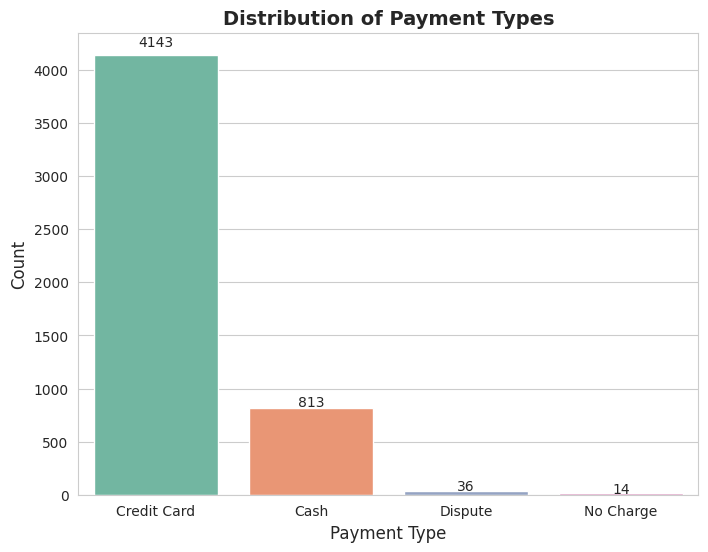

In [ ]:
# Count the occurrences of each payment type
payment_type_counts = filtered_taxi_data['payment_type'].value_counts()

# Plot the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='Set2')

# Add labels and title
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14, fontweight='bold')

# Show values on top of bars
for i, val in enumerate(payment_type_counts.values):
    plt.text(i, val * 1.02, str(val), ha='center', fontsize=10)

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/MyDrive/EDAAssignment/12Datasets/Taxizones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


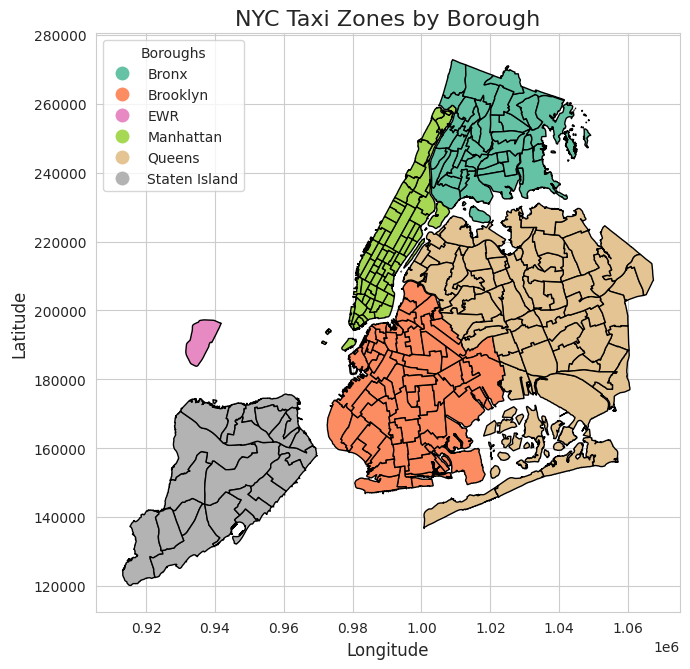

In [ ]:
# print(zones.info())
# zones.plot()
print(zones.info())
fig, ax = plt.subplots(figsize=(7, 7))

zones.plot(
    column="borough",
    cmap="Set2",
    edgecolor="black",
    legend=True,
    ax=ax,
    legend_kwds={
        'loc': 'upper left',
        'bbox_to_anchor': (0, 1),
        'title': 'Boroughs'
    }
)

ax.set_title("NYC Taxi Zones by Borough", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
taxi_data_zones_merged = filtered_taxi_data.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Check the merged DataFrame
taxi_data_zones_merged.head()


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   
1  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   
2  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   
3  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   
4  2023-04-01 00:55:24   2023-04-01 01:44:08              4.0          19.18   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID payment_type  \
0         2.0                  N           132           249  Credit Card   
1         2.0                  N           132           249  Credit Card   
2         2.0                  N           132           249  Credit Card   
3         2.0                  N           132           249  Credit Card   
4         2.0                  N           132           249  Credit Card   

   fare_amount  ...  pickup_day  pickup_month  trip_duration  OBJECTID  \
0         70.0  ...    Saturday             4      48.733333     132.0   
1         70.0  ...    Saturday             4      48.733333     132.0   
2         70.0  ...    Saturday             4      48.733333     132.0   
3         70.0  ...    Saturday             4      48.733333     132.0   
4         70.0  ...    Saturday             4      48.733333     132.0   

   Shape_Leng  Shape_Area         zone  LocationID  borough  \
0    0.245479    0.002038  JFK Airport       132.0   Queens   
1    0.245479    0.002038  JFK Airport       132.0   Queens   
2    0.245479    0.002038  JFK Airport       132.0   Queens   
3    0.245479    0.002038  JFK Airport       132.0   Queens   
4    0.245479    0.002038  JFK Airport       132.0   Queens   

                                            geometry  
0  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
1  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
2  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
3  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
4  MULTIPOLYGON (((1032791.001 181085.006, 103283...  

[5 rows x 29 columns]

In [ ]:
taxi_data_zones_merged.isnull().sum()

tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
trip_distance             0
RatecodeID                0
store_and_fwd_flag        0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
congestion_surcharge      0
Airport_fee              89
pickup_hour               0
pickup_day                0
pickup_month              0
trip_duration             0
OBJECTID                 37
Shape_Leng               37
Shape_Area               37
zone                     37
LocationID               37
borough                  37
geometry                 37
dtype: int64

In [ ]:
taxi_data_zones_merged = taxi_data_zones_merged.dropna(subset=["zone"])

In [ ]:
taxi_data_zones_merged.isnull().sum()

tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
trip_distance             0
RatecodeID                0
store_and_fwd_flag        0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
congestion_surcharge      0
Airport_fee              89
pickup_hour               0
pickup_day                0
pickup_month              0
trip_duration             0
OBJECTID                  0
Shape_Leng                0
Shape_Area                0
zone                      0
LocationID                0
borough                   0
geometry                  0
dtype: int64

In [ ]:
taxi_data_zones_merged.shape

(4969, 29)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
trips_per_location = taxi_data_zones_merged.groupby("PULocationID").size().reset_index(name="num_trips")

# Merge with taxi_data_zones_merged to get zone names
trips_per_location = trips_per_location.merge(
    taxi_data_zones_merged[["PULocationID", "zone"]].drop_duplicates(),
    on="PULocationID",
    how="left"
)

# Sort by most popular locations
trips_per_location = trips_per_location.sort_values(by="num_trips", ascending=False)

# Display the top 10 locations with zone names
trips_per_location[['PULocationID','zone','num_trips']].head(10)



PULocationID                   zone  num_trips
98            237  Upper East Side South        338
97            236  Upper East Side North        287
64            161         Midtown Center        265
46            132            JFK Airport        238
65            162           Midtown East        210
54            142    Lincoln Square East        175
100           239  Upper West Side South        160
95            234               Union Sq        152
66            163          Midtown North        150
53            141        Lenox Hill West        149

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (for locations with no trips) with 0
zones["num_trips"] = zones["num_trips"].fillna(0)
zones.head()



OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips                   zone_y  
0           1.0        2.0           Newark Airport  
1           NaN        0.0                      NaN  
2           3.0        1.0  Allerton/Pelham Gardens  
3           4.0        5.0            Alphabet City  
4           NaN        0.0                      NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

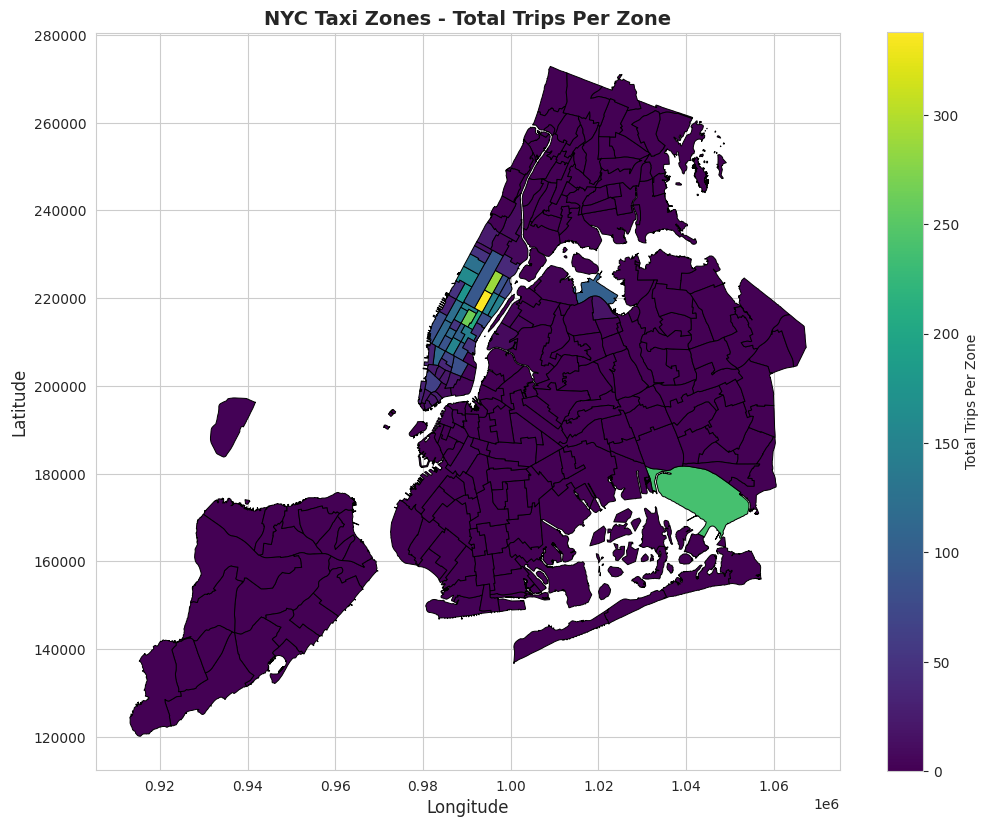

In [ ]:
# Define figure and axis


# Plot the map and display it
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 20))

# Plot NYC taxi zones colored by the number of trips
zones.sort_values(by="num_trips", ascending=False).plot(column="num_trips", cmap="viridis", edgecolor="black", linewidth=0.7,
           legend=True, ax=ax,
       legend_kwds={'label': "Total Trips Per Zone", 'orientation': "vertical",'shrink': 0.48})

# Title and labels
plt.title("NYC Taxi Zones - Total Trips Per Zone", fontsize=14, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show plot
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by="num_trips", ascending=False)
zones_sorted[["LocationID", "borough", "zone_x", "num_trips"]].head(10)


LocationID    borough                 zone_x  num_trips
236         237  Manhattan  Upper East Side South      338.0
235         236  Manhattan  Upper East Side North      287.0
160         161  Manhattan         Midtown Center      265.0
131         132     Queens            JFK Airport      238.0
161         162  Manhattan           Midtown East      210.0
141         142  Manhattan    Lincoln Square East      175.0
238         239  Manhattan  Upper West Side South      160.0
233         234  Manhattan               Union Sq      152.0
162         163  Manhattan          Midtown North      150.0
140         141  Manhattan        Lenox Hill West      149.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
# Assume df_filtered contains pickup and dropoff details with timestamps
# Filter out rows where trip duration or speed is negative
taxi_data_zones_merged['trip_duration_hours'] = (taxi_data_zones_merged['tpep_dropoff_datetime'] -
                                             taxi_data_zones_merged['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_filtered_clean = taxi_data_zones_merged[(taxi_data_zones_merged["trip_duration_hours"] > 0) & (taxi_data_zones_merged["trip_distance"] > 0)]

# Group by route and hour again with cleaned data
route_speed_clean = df_filtered_clean.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration_hours", "mean"),  # Average trip duration per route-hour
    total_distance=("trip_distance", "mean")  # Total distance per route-hour
).reset_index()

# Compute speed (distance / avg duration)
route_speed_clean["avg_speed"] = route_speed_clean["total_distance"] / (route_speed_clean["avg_duration"] + 1e-5)  # Avoid division by zero

# Find the slowest routes (smallest speed)
slowest_routes_clean = route_speed_clean.sort_values(by="avg_speed", ascending=True).head(10)  # Adjust for top N slowest routes

# Display the cleaned slowest routes
slowest_routes_clean



PULocationID  DOLocationID  pickup_hour  avg_duration  total_distance  \
1063           132           191           19      0.340833           0.010   
705            100           161           11     23.933611           0.760   
3551           237           236           22     11.936944           1.245   
1642           142           238           20     11.998889           1.825   
40              13           264           17      0.126667           0.020   
1671           143            50           14      9.620556           1.600   
3794           239           230            9     11.750278           1.985   
2436           164           256           15     23.649444           5.200   
1472           141           211           19      0.475556           0.410   
1013           132           132           18     21.365556          22.170   

      avg_speed  
1063   0.029339  
705    0.031754  
3551   0.104298  
1642   0.152097  
40     0.157882  
1671   0.166310  
3794   0.168932  
2436   0.219878  
1472   0.862131  
1013   1.037651

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

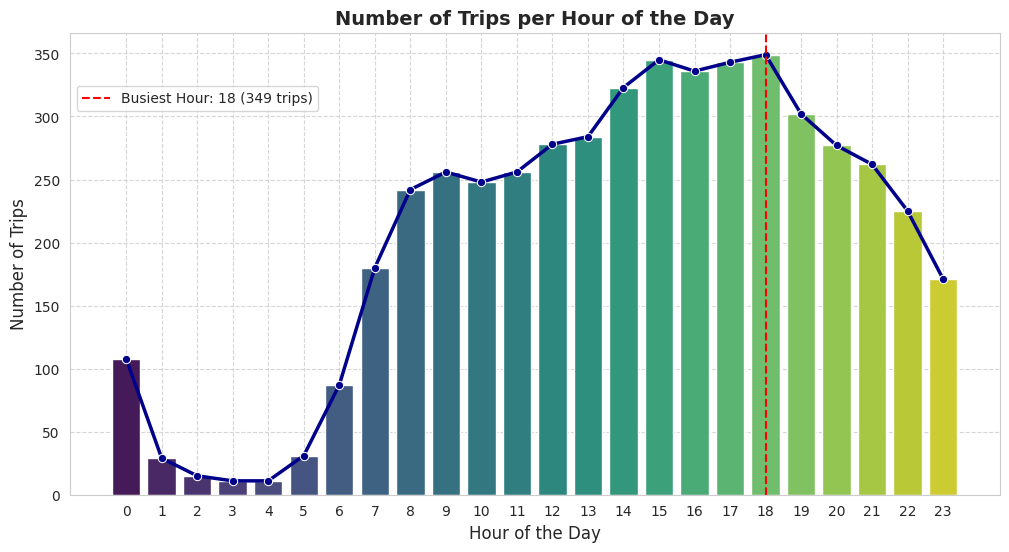

(np.int32(18), 349)

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
# Calculate the number of trips per hour
trips_per_hour = taxi_data_zones_merged.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()  # Hour with max trips
busiest_hour_trips = trips_per_hour.max()  # Number of trips in that hour

# Create the figure
plt.figure(figsize=(12, 6))

# Bar plot for the number of trips per hour
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')

# Line plot to show the trend
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, color="darkblue", marker="o",markersize=6, linewidth=2.5)

# Highlight the busiest hour with a vertical line
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Add labels and title
plt.title('Number of Trips per Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.8)
# Show the legend
plt.legend(loc="upper left", bbox_to_anchor=(0, 0.9), fontsize=10)

# Show the plot
plt.show()

# Return the busiest hour and its trip count
busiest_hour, busiest_hour_trips



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the number

# Calculate the number of trips per hour
trip_count_per_hour = taxi_data_zones_merged.groupby('pickup_hour').size().reset_index(name='trip_count')

# Scale up the number of trips using the sampling fraction
sample_fraction = 0.008  # Replace this with your actual sampling fraction
trip_count_per_hour['actual_trip_count'] = (trip_count_per_hour['trip_count'] / sample_fraction).astype(int)

# Find the five busiest hours
top_5_hours = trip_count_per_hour.nlargest(5, 'trip_count')

# Display results
top_5_hours

pickup_hour  trip_count  actual_trip_count
18           18         349              43625
15           15         345              43125
17           17         343              42875
16           16         336              42000
14           14         323              40375

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
taxi_data_zones_merged.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours']

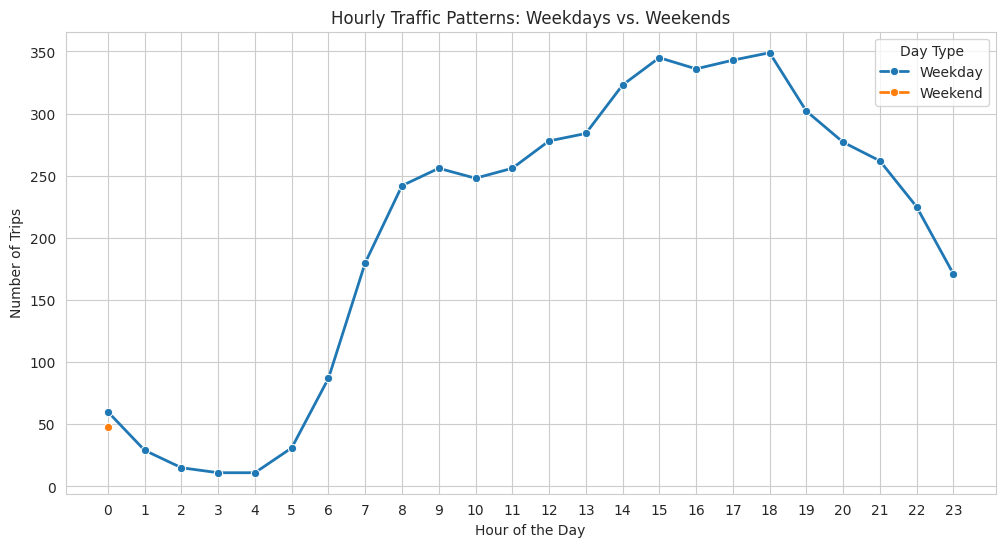

In [ ]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt
import seaborn as sns

#Convert the pickup datetime column to datetime format
taxi_data_zones_merged['tpep_pickup_datetime'] = pd.to_datetime(
    taxi_data_zones_merged['tpep_pickup_datetime'], errors='coerce'
)

#Create a column with the day of the week as a number (0=Monday, 6=Sunday)
taxi_data_zones_merged['pickup_day_num'] = taxi_data_zones_merged['tpep_pickup_datetime'].dt.weekday

#Create a column for the hour of pickup
taxi_data_zones_merged['pickup_hour'] = taxi_data_zones_merged['tpep_pickup_datetime'].dt.hour

# Separate weekdays and weekends (Weekdays: 0-4, Weekends: 5-6)
weekdays = taxi_data_zones_merged[taxi_data_zones_merged['pickup_day_num'] <= 4]
weekends = taxi_data_zones_merged[taxi_data_zones_merged['pickup_day_num'] >= 5]

# Count the number of trips per hour for weekdays and weekends
weekday_counts = weekdays.groupby('pickup_hour').size()
weekend_counts = weekends.groupby('pickup_hour').size()

# Plot the data in one figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Weekday plot
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o', label="Weekday", linewidth=2)

# Weekend plot
sns.lineplot(x=weekend_counts.index, y=weekend_counts.values, marker='o', label="Weekend", linewidth=2)

# Titles and labels
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))

# Legend
plt.legend(title="Day Type")

# Show the plot
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

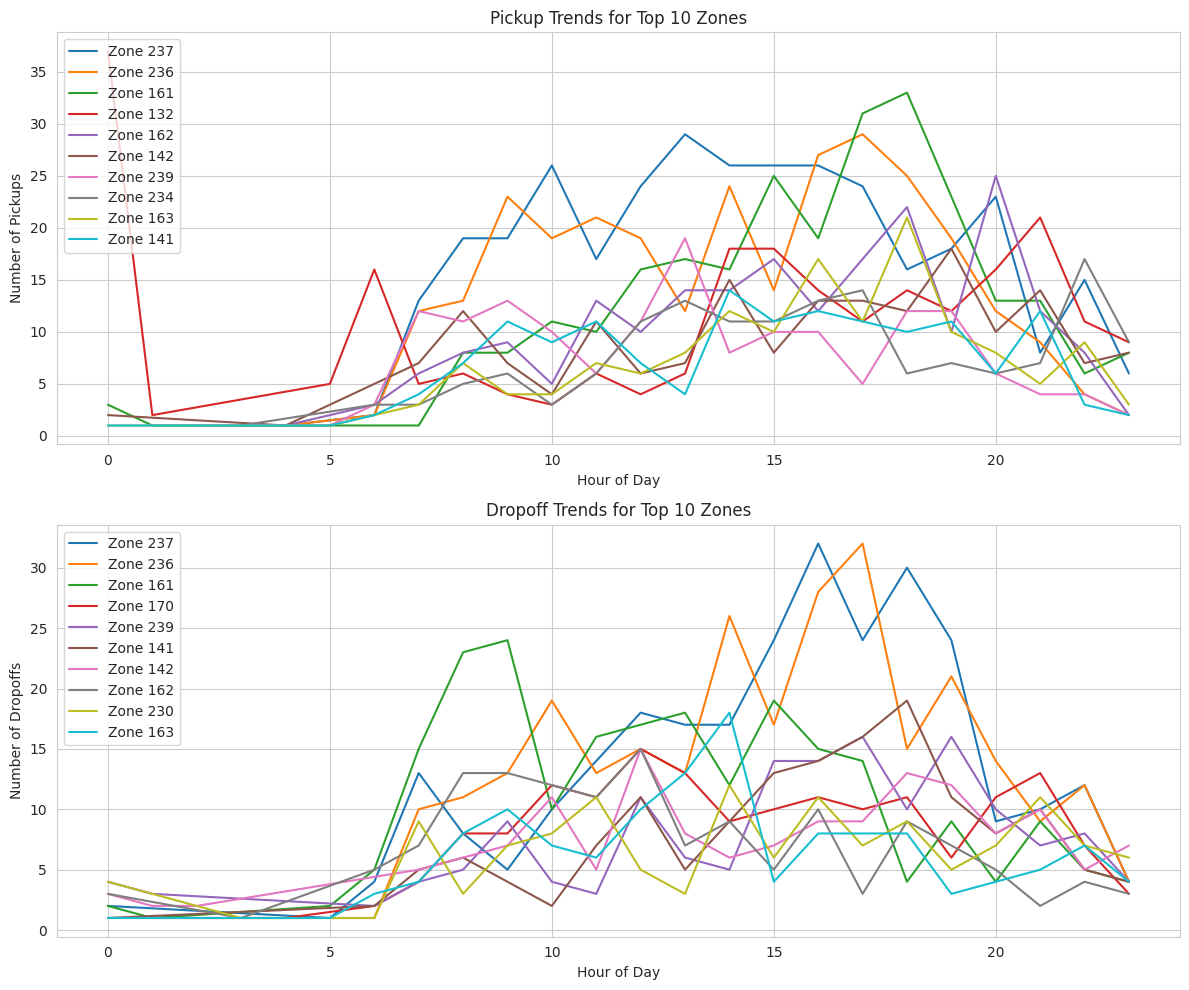

In [ ]:
# Find top 10 pickup and dropoff zones
pickup_counts = taxi_data_zones_merged.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')
taxi_data_zones_merged['dropoff_hour'] = pd.to_datetime(taxi_data_zones_merged['tpep_dropoff_datetime']).dt.hour
# Group by Dropoff Hour and DOLocationID
dropoff_counts = taxi_data_zones_merged.groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

# Find top 10 pickup zones by total pickups
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Find top 10 dropoff zones by total dropoffs
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter data for these top zones
pickup_top_zones = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
dropoff_top_zones = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the pickup and dropoff trends for top 10 zones
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Pickup Trends for Top 10 Zones
for zone in top_pickup_zones:
    zone_data = pickup_top_zones[pickup_top_zones['PULocationID'] == zone]
    ax[0].plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f'Zone {zone}')

ax[0].set_title('Pickup Trends for Top 10 Zones')
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Number of Pickups')
ax[0].legend(loc='upper left')

# Dropoff Trends for Top 10 Zones
for zone in top_dropoff_zones:
    zone_data = dropoff_top_zones[dropoff_top_zones['DOLocationID'] == zone]
    ax[1].plot(zone_data['dropoff_hour'], zone_data['dropoff_count'], label=f'Zone {zone}')

ax[1].set_title('Dropoff Trends for Top 10 Zones')
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Number of Dropoffs')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_total = pickup_counts.groupby('PULocationID')['pickup_count'].sum()

# Calculate total dropoffs per zone
dropoff_total = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum()

# Combine pickup and dropoff data for each zone into a single DataFrame
zone_data = pd.DataFrame({'total_pickups': pickup_total, 'total_dropoffs': dropoff_total})

# Fill missing values with 0 (zones with only pickups or only dropoffs)
zone_data.fillna(0, inplace=True)

# Avoid division by zero (replace 0 dropoffs with a small number)
zone_data['total_dropoffs'] = zone_data['total_dropoffs'].replace(0, 1)

# Calculate the pickup to dropoff ratio for each zone
zone_data['pickup_dropoff_ratio'] = zone_data['total_pickups'] / zone_data['total_dropoffs']

# Sort by pickup/dropoff ratio (high to low)
top_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Sort by pickup/dropoff ratio (low to high)
bottom_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display the top 10 and bottom 10 pickup/dropoff ratios
print("Top 10 Zones with the Highest Pickup/Dropoff Ratios:")
top_10_ratios



Top 10 Zones with the Highest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
70            17.0             2.0              8.500000
132          238.0            65.0              3.661538
209           26.0             8.0              3.250000
218            3.0             1.0              3.000000
138          102.0            47.0              2.170213
135            2.0             1.0              2.000000
55             2.0             1.0              2.000000
69             2.0             1.0              2.000000
260            2.0             1.0              2.000000
12             2.0             1.0              2.000000

In [ ]:
print("\nTop 10 Zones with the Lowest Pickup/Dropoff Ratios:")
bottom_10_ratios


Top 10 Zones with the Lowest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
11            0.0             1.0                   0.0
10            0.0             2.0                   0.0
28            0.0             1.0                   0.0
22            0.0             2.0                   0.0
18            0.0             1.0                   0.0
17            0.0             7.0                   0.0
16            0.0             2.0                   0.0
14            0.0             3.0                   0.0
38            0.0             2.0                   0.0
34            0.0             2.0                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM)
night_hours = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 23) | (taxi_data_zones_merged['pickup_hour'] <= 5)]

# Group by PULocationID for pickups and DOLocationID for dropoffs
pickup_night_counts = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_night_counts = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge with taxi zone lookup to get zone names
pickup_night_counts = pickup_night_counts.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
dropoff_night_counts = dropoff_night_counts.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Sort to get the top 10 zones
top_pickup_zones_night = pickup_night_counts.sort_values(by='pickup_count', ascending=False).head(10)
top_dropoff_zones_night = dropoff_night_counts.sort_values(by='dropoff_count', ascending=False).head(10)

# Select only relevant columns for display
top_pickup_zones_night = top_pickup_zones_night.rename(columns={'zone_x': 'Zone', 'PULocationID_x': 'PULocationID'})
top_dropoff_zones_night = top_dropoff_zones_night.rename(columns={'zone_x': 'Zone', 'DOLocationID': 'DOLocationID'})
top_pickup_zones_night = top_pickup_zones_night[['Zone', 'borough', 'PULocationID', 'pickup_count']]
top_dropoff_zones_night = top_dropoff_zones_night[['Zone', 'borough', 'DOLocationID', 'dropoff_count']]
# Display results
print("Top 10 Night Pickup Zones:")
top_pickup_zones_night



Top 10 Night Pickup Zones:


Zone    borough  PULocationID  pickup_count
18                   JFK Airport     Queens           132            53
5                   Clinton East  Manhattan            48            27
38                       Seaport  Manhattan           209            24
52                  West Village  Manhattan           249            23
42     Times Sq/Theatre District  Manhattan           230            17
30                Midtown Center  Manhattan           161            14
10                  East Village  Manhattan            79            14
37  Penn Station/Madison Sq West  Manhattan           186            12
24           Lincoln Square East  Manhattan           142            11
46                      Union Sq  Manhattan           234            10

In [ ]:
top_dropoff_zones_night

Zone    borough  DOLocationID  dropoff_count
88           West Village  Manhattan           249             33
72     Stuyvesant Heights   Brooklyn           225             24
51          Midtown South  Manhattan           164             14
83  Upper West Side South  Manhattan           239             12
19           East Village  Manhattan            79             11
40    Lincoln Square East  Manhattan           142             10
4       Battery Park City  Manhattan            13              9
78    UN/Turtle Bay South  Manhattan           233              9
49           Midtown East  Manhattan           162              8
80  Upper East Side North  Manhattan           236              8

<Figure size 960x720 with 0 Axes>

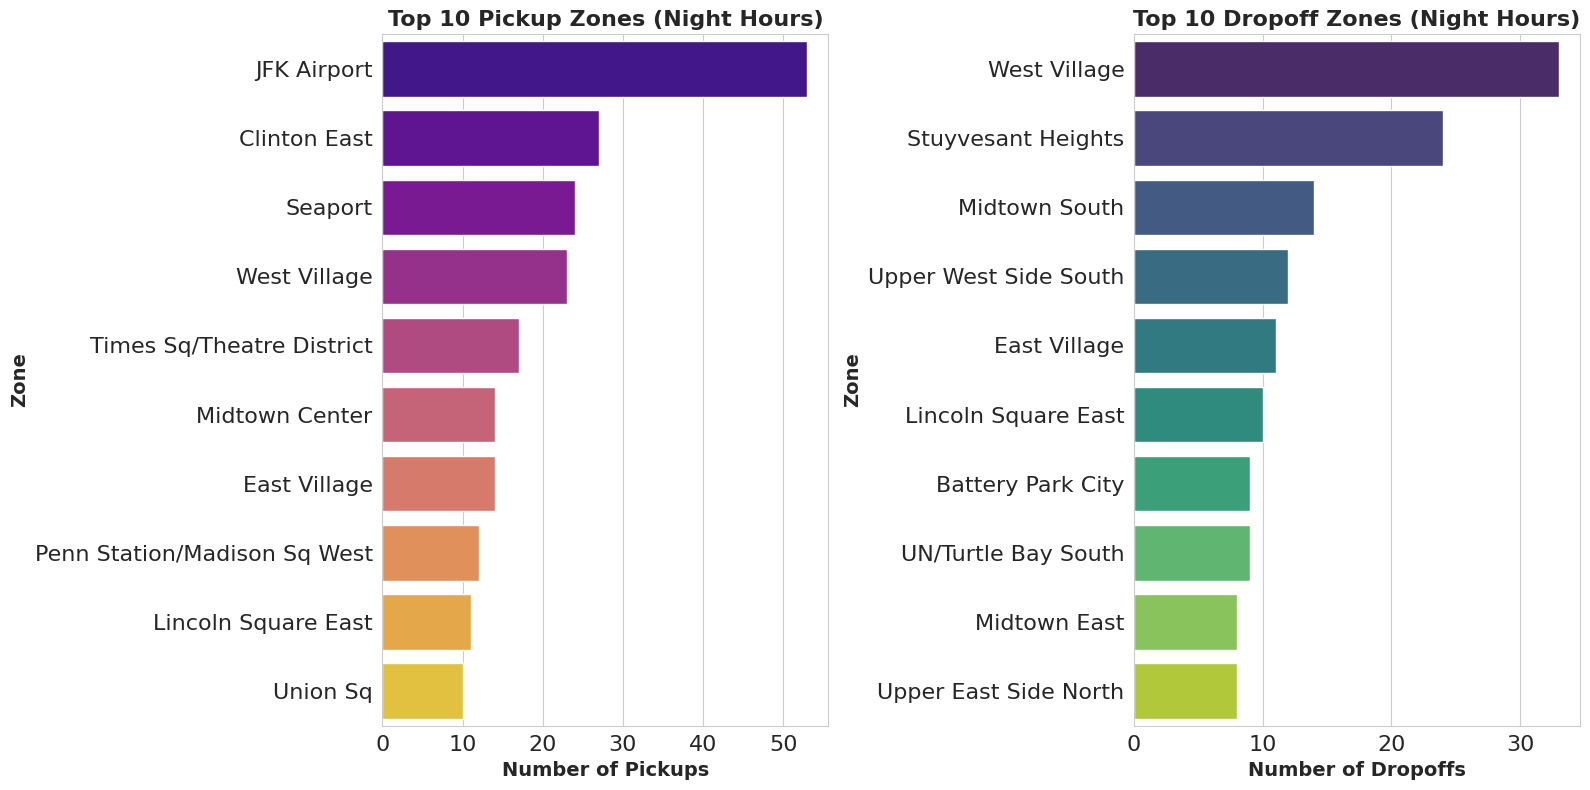

In [ ]:
# Set plot style and increase figure quality
sns.set_style("whitegrid")
plt.figure(dpi=150)  # Increase DPI for better clarity

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Define font properties for better readability
title_font = {'fontsize': 16, 'fontweight': 'bold'}
label_font = {'fontsize': 14, 'fontweight': 'bold'}
tick_fontsize = 16

# Plot Pickup Zones
sns.barplot(data=top_pickup_zones_night, x='pickup_count', y='Zone', ax=axes[0], palette="plasma")
axes[0].set_title('Top 10 Pickup Zones (Night Hours)', **title_font)
axes[0].set_xlabel('Number of Pickups', **label_font)
axes[0].set_ylabel('Zone', **label_font)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)

# Plot Dropoff Zones
sns.barplot(data=top_dropoff_zones_night, x='dropoff_count', y='Zone', ax=axes[1], palette="viridis")
axes[1].set_title('Top 10 Dropoff Zones (Night Hours)', **title_font)
axes[1].set_xlabel('Number of Dropoffs', **label_font)
axes[1].set_ylabel('Zone', **label_font)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)

# Rotate Y-axis labels slightly for better readability
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
# Night hours: 11 PM to 5 AM
night_hours_df = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 23) | (taxi_data_zones_merged['pickup_hour'] <= 5)]

# Day hours: 6 AM to 10 PM
day_hours_df = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 6) & (taxi_data_zones_merged['pickup_hour'] <= 22)]

# Calculate total revenue for night and day hours
total_revenue_night = night_hours_df['total_amount'].sum()
total_revenue_day = day_hours_df['total_amount'].sum()

# Calculate total revenue overall
total_revenue = taxi_data_zones_merged['total_amount'].sum()

# Calculate revenue share for night and day hours
night_revenue_share = total_revenue_night / total_revenue * 100
day_revenue_share = total_revenue_day / total_revenue * 100

print("night_revenue_share:-", night_revenue_share.round(2),"day_revenue_share:-", day_revenue_share.round(2))


night_revenue_share:- 9.66 day_revenue_share:- 90.34


In [ ]:
# Labels and values for the pie chart
labels = ['Night Revenue (11 PM - 5 AM)', 'Day Revenue (6 AM - 10 PM)']
values = [night_revenue_share, day_revenue_share]
colors = ['#1f77b4', '#ff7f0e']  # Red-orange for night, green for day

# Create a pie chart
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and styling
plt.title('Revenue Share: Night vs Day', fontsize=10, fontweight='bold')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

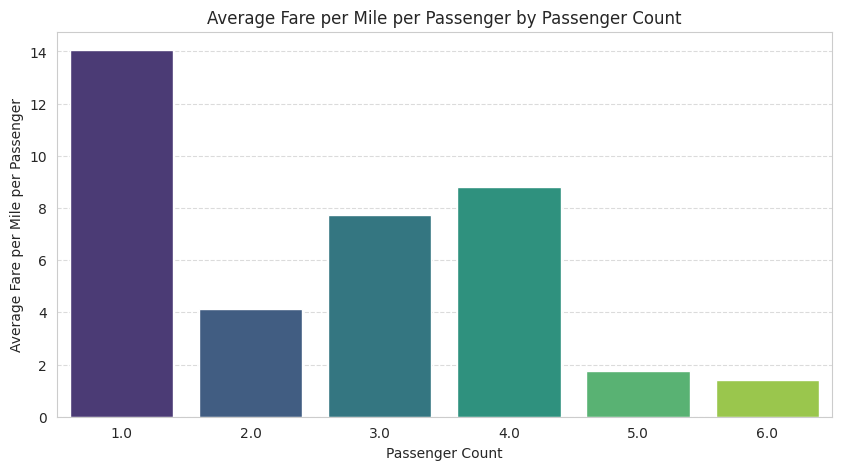

passenger_count  fare_per_mile_per_passenger
0              1.0                    14.054513
1              2.0                     4.141761
2              3.0                     7.722482
3              4.0                     8.817857
4              5.0                     1.749664
5              6.0                     1.401074

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
taxi_data_zones_merged = taxi_data_zones_merged.loc[taxi_data_zones_merged['trip_distance'] > 0].copy()

# Compute fare per mile and fare per mile per passenger
taxi_data_zones_merged['fare_per_mile'] = taxi_data_zones_merged['fare_amount'] / taxi_data_zones_merged['trip_distance']
taxi_data_zones_merged['fare_per_mile_per_passenger'] = (
    taxi_data_zones_merged['fare_per_mile'] / taxi_data_zones_merged['passenger_count']
)

# Group by passenger count and compute average fare per mile per passenger
avg_fare_per_mile_per_passenger = taxi_data_zones_merged.groupby('passenger_count', as_index=False).agg(
    {'fare_per_mile_per_passenger': 'mean'}
)

# **Plotting the results**
plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_fare_per_mile_per_passenger,
    x='passenger_count',
    y='fare_per_mile_per_passenger',
    palette='viridis'
)
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger")
plt.title("Average Fare per Mile per Passenger by Passenger Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()
avg_fare_per_mile_per_passenger



In [ ]:
taxi_data_zones_merged.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'pickup_day',
       'pickup_month', 'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'trip_duration_hours',
       'pickup_day_num', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger'],
      dtype='object')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

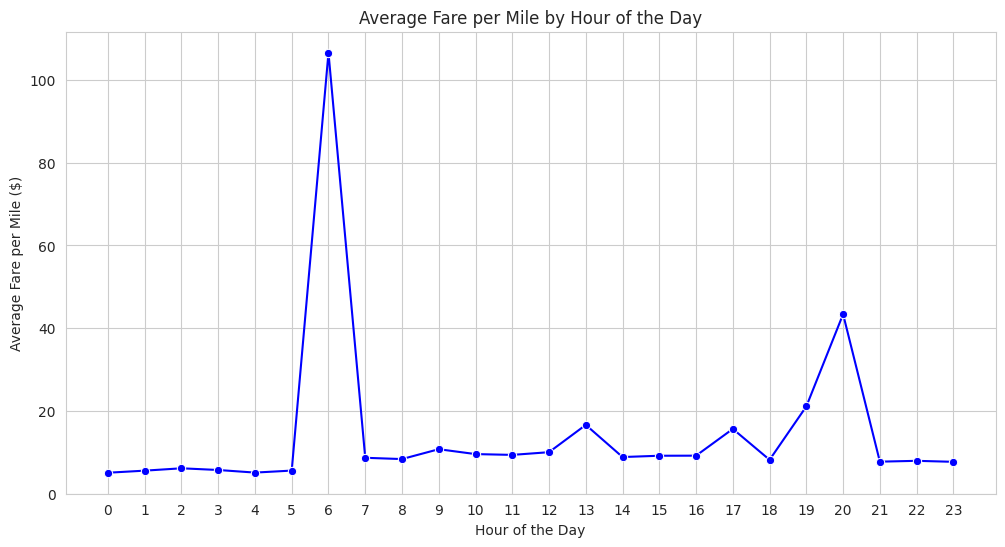

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
# Group by hour of the day and calculate average fare per mile
avg_fare_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['fare_per_mile'].mean()

# Group by day of the week and calculate average fare per mile
avg_fare_by_day = taxi_data_zones_merged.groupby('pickup_day')['fare_per_mile'].mean()

# Plot the average fare per mile by hour of day
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_fare_by_hour.index, y=avg_fare_by_hour.values, marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24), labels=[f"{i}" for i in range(0, 24)])
plt.show()

# Plot the average fare per mile by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values, palette="plasma")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
print(taxi_data_zones_merged.columns)


Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'pickup_day',
       'pickup_month', 'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'trip_duration_hours',
       'pickup_day_num', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger'],
      dtype='object')


In [ ]:
# Convert pickup datetime
taxi_data_zones_merged['tpep_pickup_datetime'] = pd.to_datetime(
    taxi_data_zones_merged['tpep_pickup_datetime'], errors='coerce'
)

# Extract pickup hour
if 'pickup_hour' not in taxi_data_zones_merged.columns:
    taxi_data_zones_merged['pickup_hour'] = taxi_data_zones_merged['tpep_pickup_datetime'].dt.hour

# Filter out zero or negative distances
taxi_data_zones_merged = taxi_data_zones_merged[taxi_data_zones_merged['trip_distance'] > 0]

# Calculate fare_per_mile if not present
if 'fare_per_mile' not in taxi_data_zones_merged.columns:
    taxi_data_zones_merged['fare_per_mile'] = (
        taxi_data_zones_merged['fare_amount'] / taxi_data_zones_merged['trip_distance']
    )


In [ ]:
# Compare fare per mile for different vendors

# Now group by Vendor and Hour
fare_by_vendor_hour = taxi_data_zones_merged.groupby(
    ["payment_type", "pickup_hour"]
)["fare_per_mile"].mean().reset_index()





# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="pickup_hour", y="fare_per_mile", hue="payment_type", data=fare_by_vendor_hour,
    marker="o", palette="coolwarm", linewidth=2, ci=95  # Adding confidence interval
)

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="payment_type")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dotted gridlines for better readability

plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


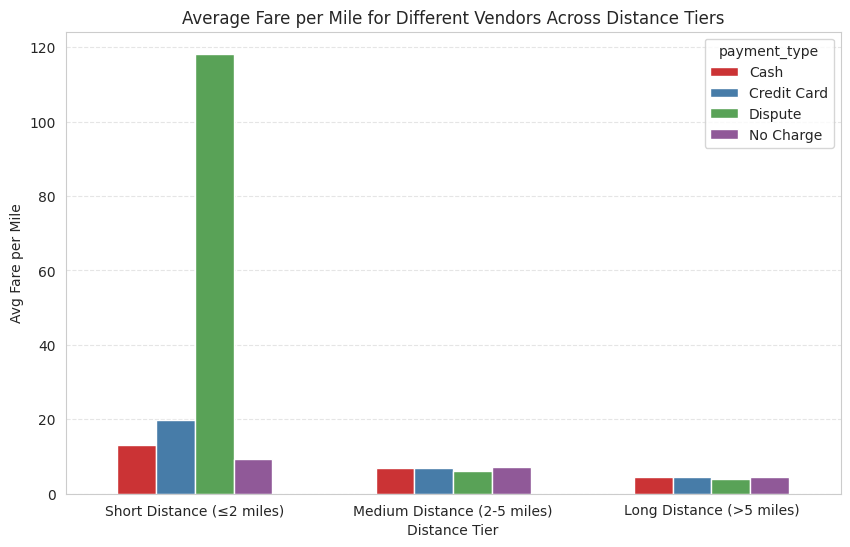

In [ ]:
# Defining distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return "Short Distance (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium Distance (2-5 miles)"
    else:
        return "Long Distance (>5 miles)"

# Apply categorization
taxi_data_zones_merged["distance_tier"] = taxi_data_zones_merged["trip_distance"].apply(categorize_distance)

# Ensure correct categorical order
distance_order = ["Short Distance (≤2 miles)", "Medium Distance (2-5 miles)", "Long Distance (>5 miles)"]
taxi_data_zones_merged["distance_tier"] = pd.Categorical(taxi_data_zones_merged["distance_tier"], categories=distance_order, ordered=True)

# Group by payment_type & Distance Tier
fare_by_payment_type_tier = taxi_data_zones_merged.groupby(["payment_type", "distance_tier"], as_index=False).agg(
    {"fare_per_mile": "mean"}
)

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="distance_tier", y="fare_per_mile", hue="payment_type", data=fare_by_payment_type_tier, palette="Set1", dodge=True, width = .6)

# Formatting
plt.xlabel("Distance Tier")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors Across Distance Tiers")
plt.legend(title="payment_type")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
taxi_data_zones_merged['tip_percentage'] = (taxi_data_zones_merged['tip_amount'] / taxi_data_zones_merged['fare_amount']) * 100


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

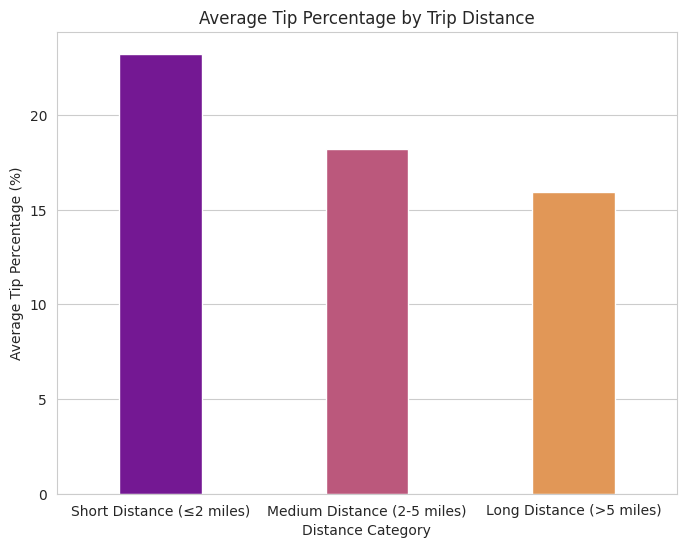

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Calculate the average tip percentage by distance category
avg_tip_by_distance = taxi_data_zones_merged.groupby('distance_tier')['tip_percentage'].mean().reset_index()


# Plot the average tip percentage by distance category
plt.figure(figsize=(8, 6))
sns.barplot(x="distance_tier", y="tip_percentage", data=avg_tip_by_distance, palette="plasma", width = .4)
plt.xlabel('Distance Category')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Trip Distance')
plt.xticks(rotation=0)
plt.show()




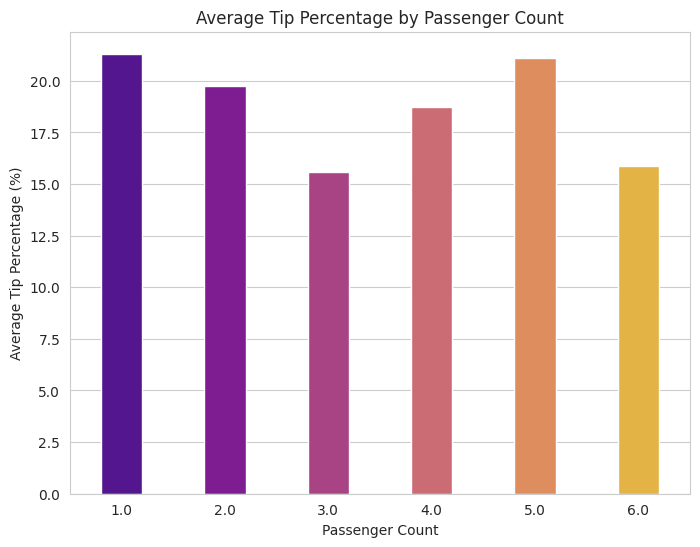

In [ ]:
# Calculate the average tip percentage by passenger count
avg_tip_by_passenger_count = taxi_data_zones_merged.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by passenger count
plt.figure(figsize=(8, 6))
sns.barplot(x="passenger_count", y="tip_percentage", data=avg_tip_by_passenger_count, palette="plasma", width = .4)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Passenger Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Calculate the average tip percentage by hour of pickup
avg_tip_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by hour of the day
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_tip_by_hour, x="pickup_hour", y="tip_percentage", marker="o", color="red", linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

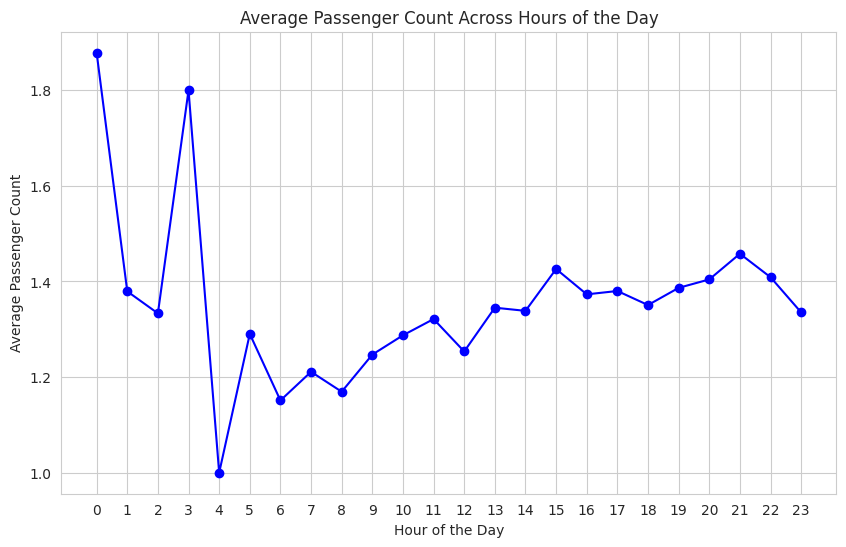

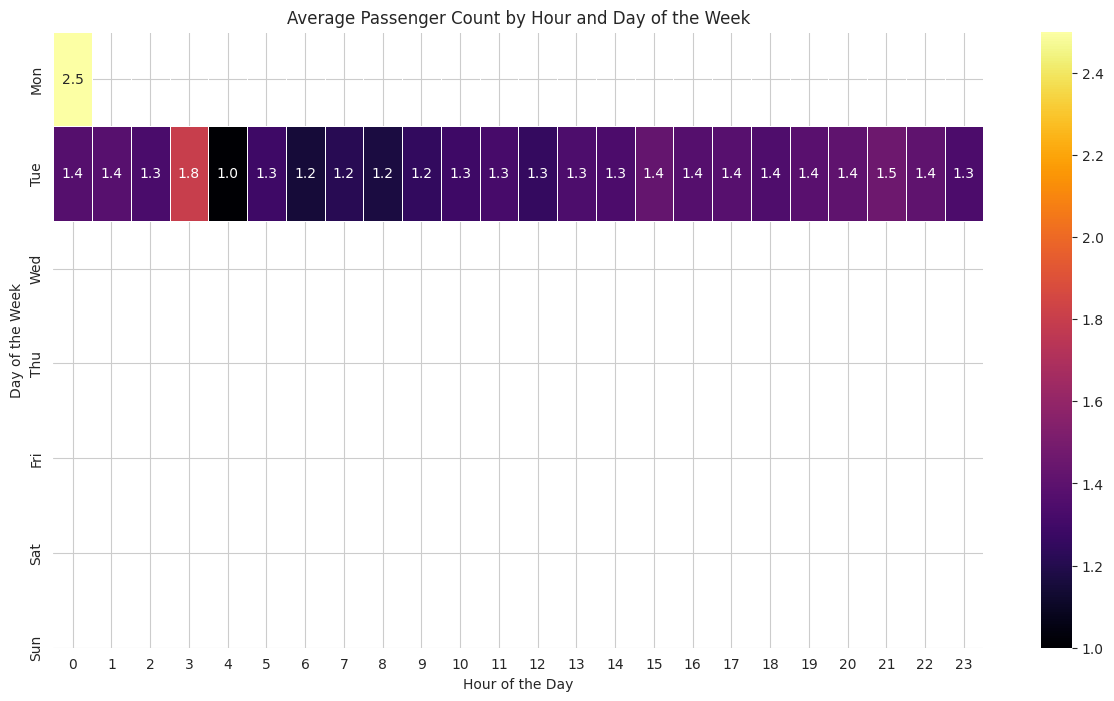

In [ ]:
# See how passenger count varies across hours and days
# Group by hour of the day and calculate average passenger count
avg_passenger_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['passenger_count'].mean()

# Group by day of the week and calculate average passenger count
avg_passenger_by_day = taxi_data_zones_merged.groupby('pickup_day')['passenger_count'].mean()

passenger_heatmap = taxi_data_zones_merged.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

# Plot the variation of passenger count across hours of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_hour.index, avg_passenger_by_hour.values, marker='o', color='b')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))  # Set x-ticks to represent hours of the day (0-23)
plt.grid(True)
plt.show()

# Plot the variation of passenger count across days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_day.index, avg_passenger_by_day.values, marker='o', color='g')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 7), days_of_week)  # Set x-ticks to represent days of the week
plt.grid(True)
plt.show()

#Heatmap - Passenger Count by Hour & Day
plt.figure(figsize=(15, 8))
sns.heatmap(passenger_heatmap, cmap="inferno", annot=True, fmt=".1f", linewidths=0.5, xticklabels=range(0, 24), yticklabels=days_of_week)
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

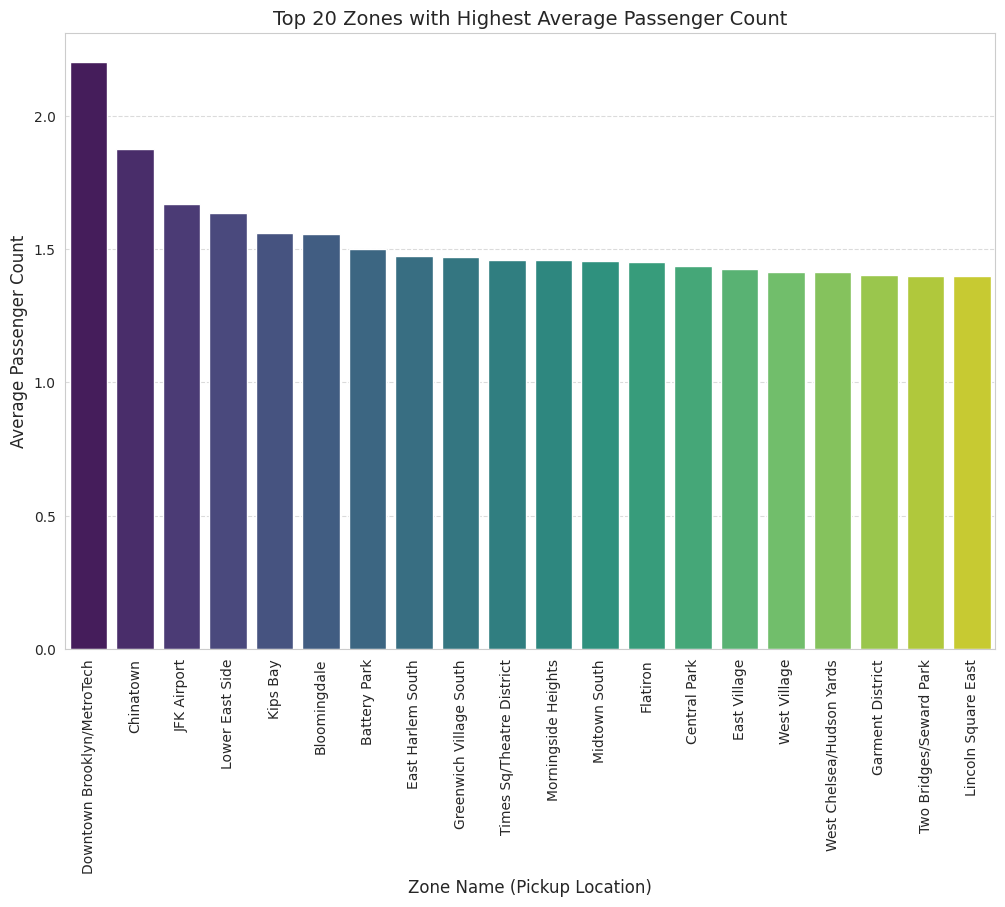

In [ ]:
# How does passenger count vary across zones
# Group by 'zone' and calculate average passenger count
avg_passenger_by_zone = taxi_data_zones_merged.groupby('zone')['passenger_count'].mean()

# Sort in descending order for better visualization
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(ascending=False).reset_index()

# **Plot top 20 zones with highest average passenger count**
plt.figure(figsize=(12, 8))
sns.barplot(x="zone", y="passenger_count", data=avg_passenger_by_zone_sorted.head(20), palette="viridis")

# Formatting
plt.title("Top 20 Zones with Highest Average Passenger Count", fontsize=14)
plt.xlabel("Zone Name (Pickup Location)", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [ ]:
taxi_data_zones_merged.columns.to_list()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours',
 'pickup_day_num',
 'dropoff_hour',
 'fare_per_mile',
 'fare_per_mile_per_passenger',
 'distance_tier',
 'tip_percentage']

In [ ]:
# Drop duplicate columns
taxi_data_zones_merged = taxi_data_zones_merged.drop(columns=['LocationID_dropoff', 'zone_dropoff'], errors='ignore')

# Verify that the columns are removed
print(taxi_data_zones_merged.columns)

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'pickup_day',
       'pickup_month', 'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'trip_duration_hours',
       'pickup_day_num', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'distance_tier', 'tip_percentage'],
      dtype='object')


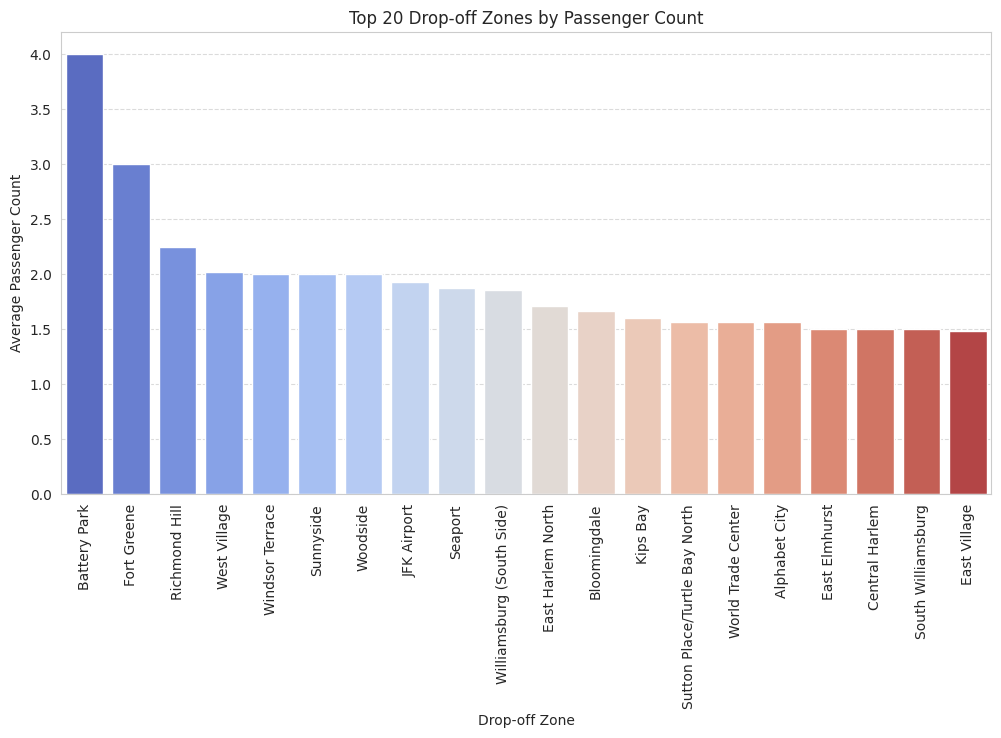

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Create a mapping of LocationID to Zone Name
location_to_zone = taxi_data_zones_merged[['LocationID', 'zone']].drop_duplicates()

# Merge drop-off location names into the dataset
taxi_data_zones_merged = taxi_data_zones_merged.merge(location_to_zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("", "_dropoff"))
# Group by Drop-off Zone Name instead of ID
avg_passenger_by_dropoff = taxi_data_zones_merged.groupby("zone_dropoff")["passenger_count"].mean().reset_index()

# Sort in descending order
avg_passenger_by_dropoff_sorted = avg_passenger_by_dropoff.sort_values(by="passenger_count", ascending=False)

# Plot top 20 drop-off zones
plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="passenger_count", data=avg_passenger_by_dropoff_sorted.head(20), palette="coolwarm")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Drop-off Zones by Passenger Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

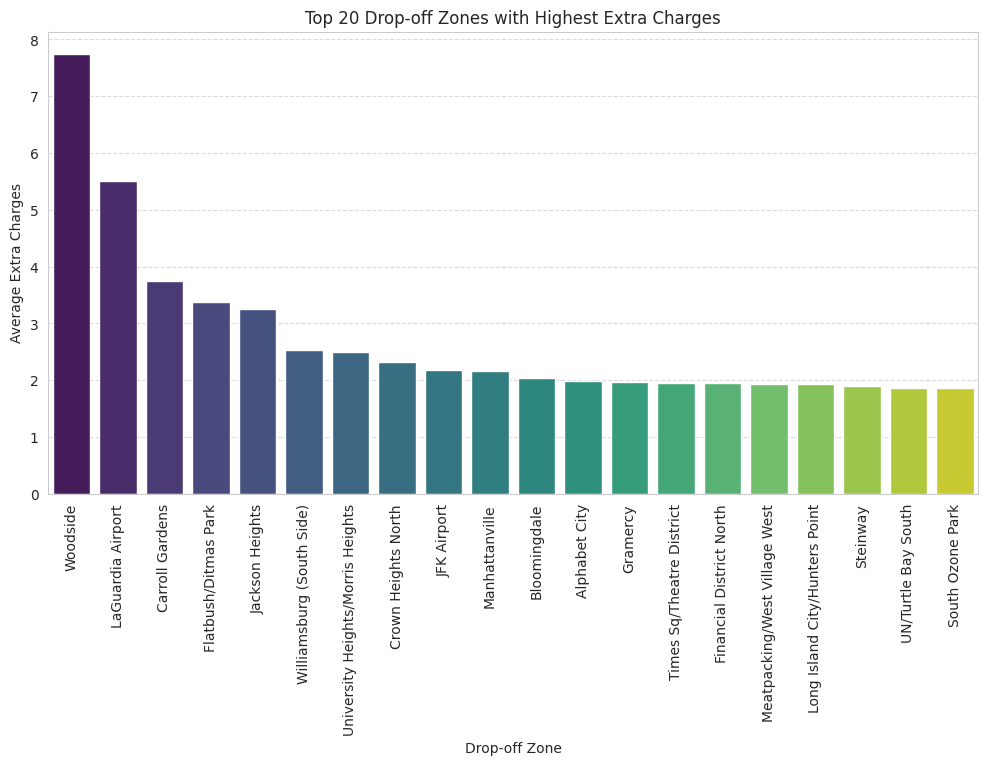

In [ ]:
# How often is each surcharge applied?
# Calculate total extra charges per pickup zone
extra_by_pickup = taxi_data_zones_merged.groupby("zone")["extra"].mean().reset_index()

# Sort in descending order
extra_by_pickup_sorted = extra_by_pickup.sort_values(by="extra", ascending=False)

# Plot top 20 zones with highest extra charges
plt.figure(figsize=(12, 6))
sns.barplot(x="zone", y="extra", data=extra_by_pickup_sorted.head(20), palette="coolwarm")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Extra Charges ($)")
plt.title("Top 20 Pickup Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Repeat for drop-off zones
extra_by_dropoff = taxi_data_zones_merged.groupby("zone_dropoff")["extra"].mean().reset_index()
extra_by_dropoff_sorted = extra_by_dropoff.sort_values(by="extra", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="extra", data=extra_by_dropoff_sorted.head(20), palette="viridis")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Extra Charges")
plt.title("Top 20 Drop-off Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



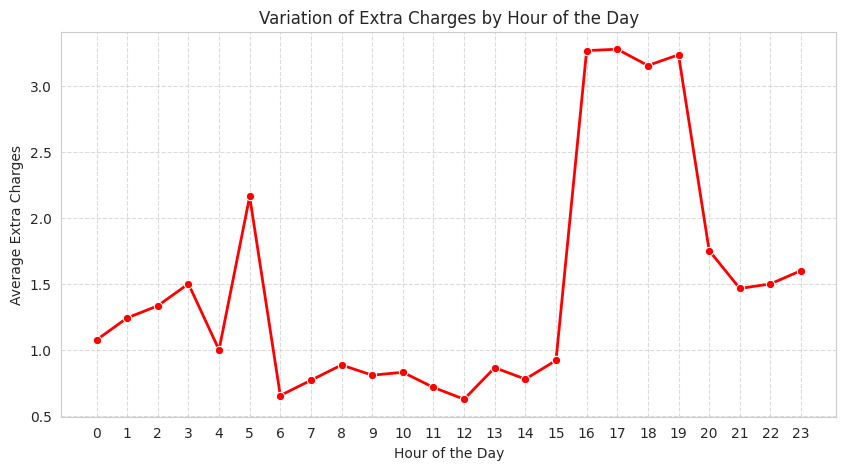

In [ ]:
# Group by hour of the day and calculate average extra charges
extra_by_hour = taxi_data_zones_merged.groupby("pickup_hour")["extra"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=extra_by_hour, x="pickup_hour", y="extra", marker="o", color="r", linewidth=2)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges")
plt.title("Variation of Extra Charges by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Group by pickup day and hour to calculate average extra charges
extra_heatmap_data = taxi_data_zones_merged.groupby(["pickup_day", "pickup_hour"])["extra"].mean().unstack()

# Create heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(extra_heatmap_data, cmap="magma", annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Extra Charges by Pickup Time")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Demand Patterns:**

*   **Hourly Demand:** Demand for taxi services in NYC peaks during the afternoon (around 3 PM) and evening (around 6 PM), especially on weekdays. There is a noticeable dip in the early morning hours (around 4-5 AM). Weekend patterns show a later peak in the evening/night compared to weekdays, aligning with leisure activities.
*   **Daily Demand:** Fridays and Saturdays are the busiest days of the week, indicating a higher demand during the weekend, likely for social events and leisure travel. Weekdays show a more consistent, but lower, demand compared to the peak weekend days.
*   **Monthly Demand:** Demand fluctuates throughout the year, with some months showing slightly higher activity than others. This could be influenced by seasonality, tourism, and major events in the city.
*   **Geographical Demand:** Certain zones consistently experience high pickup and dropoff volumes, particularly those in Manhattan (e.g., Times Sq/Theatre District, Upper East Side North, East Village). These areas represent key hubs for both starting and ending trips. Analyzing the pickup-to-dropoff ratios highlights zones with significant inbound or outbound traffic imbalances, indicating areas where taxis are frequently needed or often left empty.
*   **Nighttime Demand:** While overall revenue is lower at night, certain zones still show significant pickup and dropoff activity during these hours. Identifying these hotspots (e.g., areas around nightlife venues, airports) is crucial for targeted night service.

**Operational Efficiency:**

*   **Slow Routes:** Identifying routes with low average speeds at specific times of the day helps pinpoint potential congestion points or inefficient travel paths. This information is vital for dynamic routing suggestions to drivers, especially during peak hours.
*   **Passenger Count Variation:** Average passenger count varies throughout the day and week, and across different zones. This suggests that matching vehicle size or type to expected passenger loads in certain areas and times could improve efficiency. Zones with higher average passenger counts might benefit from larger vehicles.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Location:** Prioritize positioning taxis in high-demand zones, particularly in Manhattan, during peak hours. Utilize the pickup/dropoff ratio analysis to strategically relocate taxis from zones with low demand/high dropoffs to zones with high demand/high pickups. For example, sending drivers from zones with high dropoff ratios but low pickup ratios to nearby zones with the opposite pattern would reduce empty mileage.
2.  **Time of Day:**
    *   **Peak Hours (Afternoon/Evening Weekdays, Evening/Night Weekends):** Focus on high fleet availability and efficient dispatching to the busiest zones during these times. Consider dynamic pricing strategies (surge pricing) during peak demand in high-traffic areas to balance supply and demand and incentivize drivers.
    *   **Off-Peak Hours (Early Morning):** While overall demand is lower, identify specific night-time hotspots (e.g., entertainment districts, airports) and ensure sufficient coverage in these areas. Consider offering incentives for night-time driving in designated zones.
3.  **Day of the Week:** Increase fleet size and driver availability on Fridays and Saturdays to cater to the higher weekend demand. Adjust operational strategies to reflect the later evening/night peaks on weekends compared to weekdays.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1.  **Location:** Prioritize positioning taxis in high-demand zones, particularly in Manhattan, during peak hours. Utilize the pickup/dropoff ratio analysis to strategically relocate taxis from zones with low demand/high dropoffs to zones with high demand/high pickups. For example, sending drivers from zones with high dropoff ratios but low pickup ratios to nearby zones with the opposite pattern would reduce empty mileage.
2.  **Time of Day:**
    *   **Peak Hours (Afternoon/Evening Weekdays, Evening/Night Weekends):** Focus on high fleet availability and efficient dispatching to the busiest zones during these times. Consider dynamic pricing strategies (surge pricing) during peak demand in high-traffic areas to balance supply and demand and incentivize drivers.
    *   **Off-Peak Hours (Early Morning):** While overall demand is lower, identify specific night-time hotspots (e.g., entertainment districts, airports) and ensure sufficient coverage in these areas. Consider offering incentives for night-time driving in designated zones.
3.  **Day of the Week:** Increase fleet size and driver availability on Fridays and Saturdays to cater to the higher weekend demand. Adjust operational strategies to reflect the later evening/night peaks on weekends compared to weekdays.
4.  **Routing and Dispatching:**
    *   Implement dynamic routing that considers real-time traffic data and historical "slow route" information, especially during peak hours, to minimize trip duration and improve efficiency.
    *   Optimize dispatching algorithms to proactively send drivers to areas where high demand is anticipated based on historical hourly and daily patterns for specific zones.
    *   Utilize the passenger count analysis to potentially recommend or prioritize larger vehicles in zones and times with historically higher average passenger counts.
5.  **Pricing Strategies:**
    *   Review and potentially adjust fare structures based on distance tiers and time of day, aligning with average fare per mile patterns to remain competitive and profitable.
    *   Investigate factors influencing low tip percentages and explore ways to enhance the customer experience or driver service to encourage higher tips, which can also benefit driver retention.
6.  **Payment and Customer Service:** Ensure seamless and reliable digital payment options, as credit card is the dominant payment type. Address any reported issues with surcharges or extra fees to maintain customer trust.

In essence, a successful strategy involves a continuous feedback loop of analyzing demand and operational data (location, time, day, passenger count, etc.), strategically positioning the fleet, implementing dynamic pricing and routing, and optimizing driver incentives to match supply with demand in real-time across the diverse landscape of NYC taxi operations.